In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src import FTBS, FTCS, crafted_solution, Lp_error, FTBS_2

In [3]:
plt.rcParams['figure.dpi'] = 300

## Rozwiązanie numeryczne modelu Payne'a-Whithama

### Parametry (do dopasowania)

In [14]:
N = 40
T = 102
h = 0.25 # w kilometrach
k = h/150 # w godzinach
rho_max = 20
v_max = 100
tau = 0.1
chi = 120
c0 = 350
l = 3   
m = 1.8

#### Czas i przestrzeń

In [15]:
space = np.linspace(0, h*N, N+1)
time = np.linspace(0, k*T, T+1)

### Warunki początkowe (do dopasowania)

In [16]:
init_rho = 5*np.exp((-(space - 7)**2)/9)
init_v = v_max*(1 - init_rho/rho_max)

### Warunki brzegowe (do dopasowania)

In [17]:
bound_rho_1 = (time>0)*5
bound_v_1 = (time>0)*(-60) + init_v[0]
bound_rho_2 = np.ones(T+1)*init_rho[N]
bound_v_2 = np.ones(T+1)*init_v[N]

#### Rozwiązanie schematem pierwszym

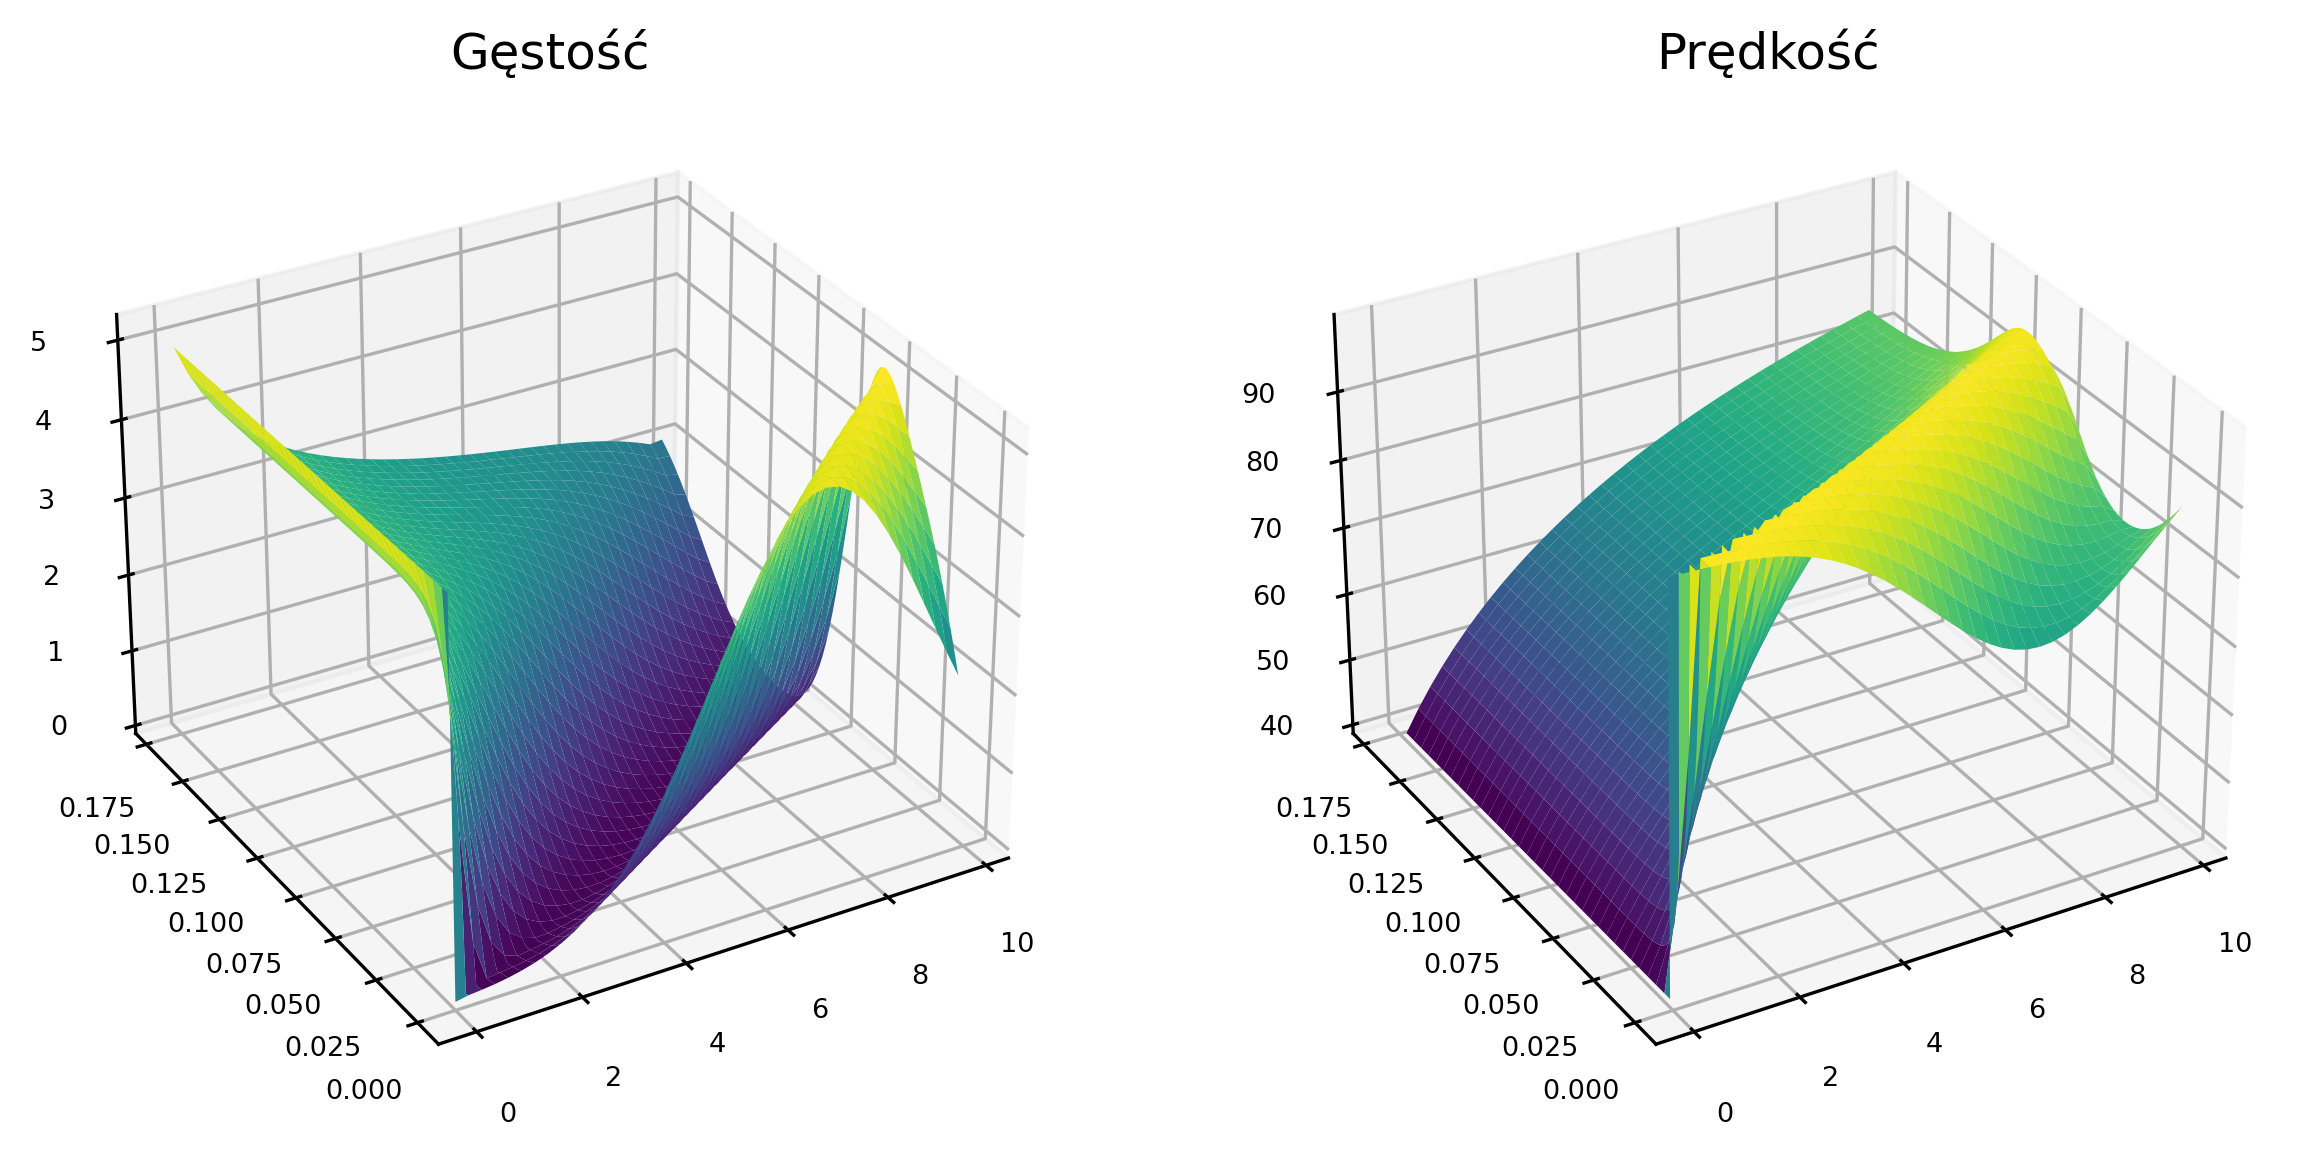

In [18]:
r1, v1, c = FTBS((init_rho, init_v), (bound_rho_1, bound_v_1), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Rozwiązanie schematem drugim

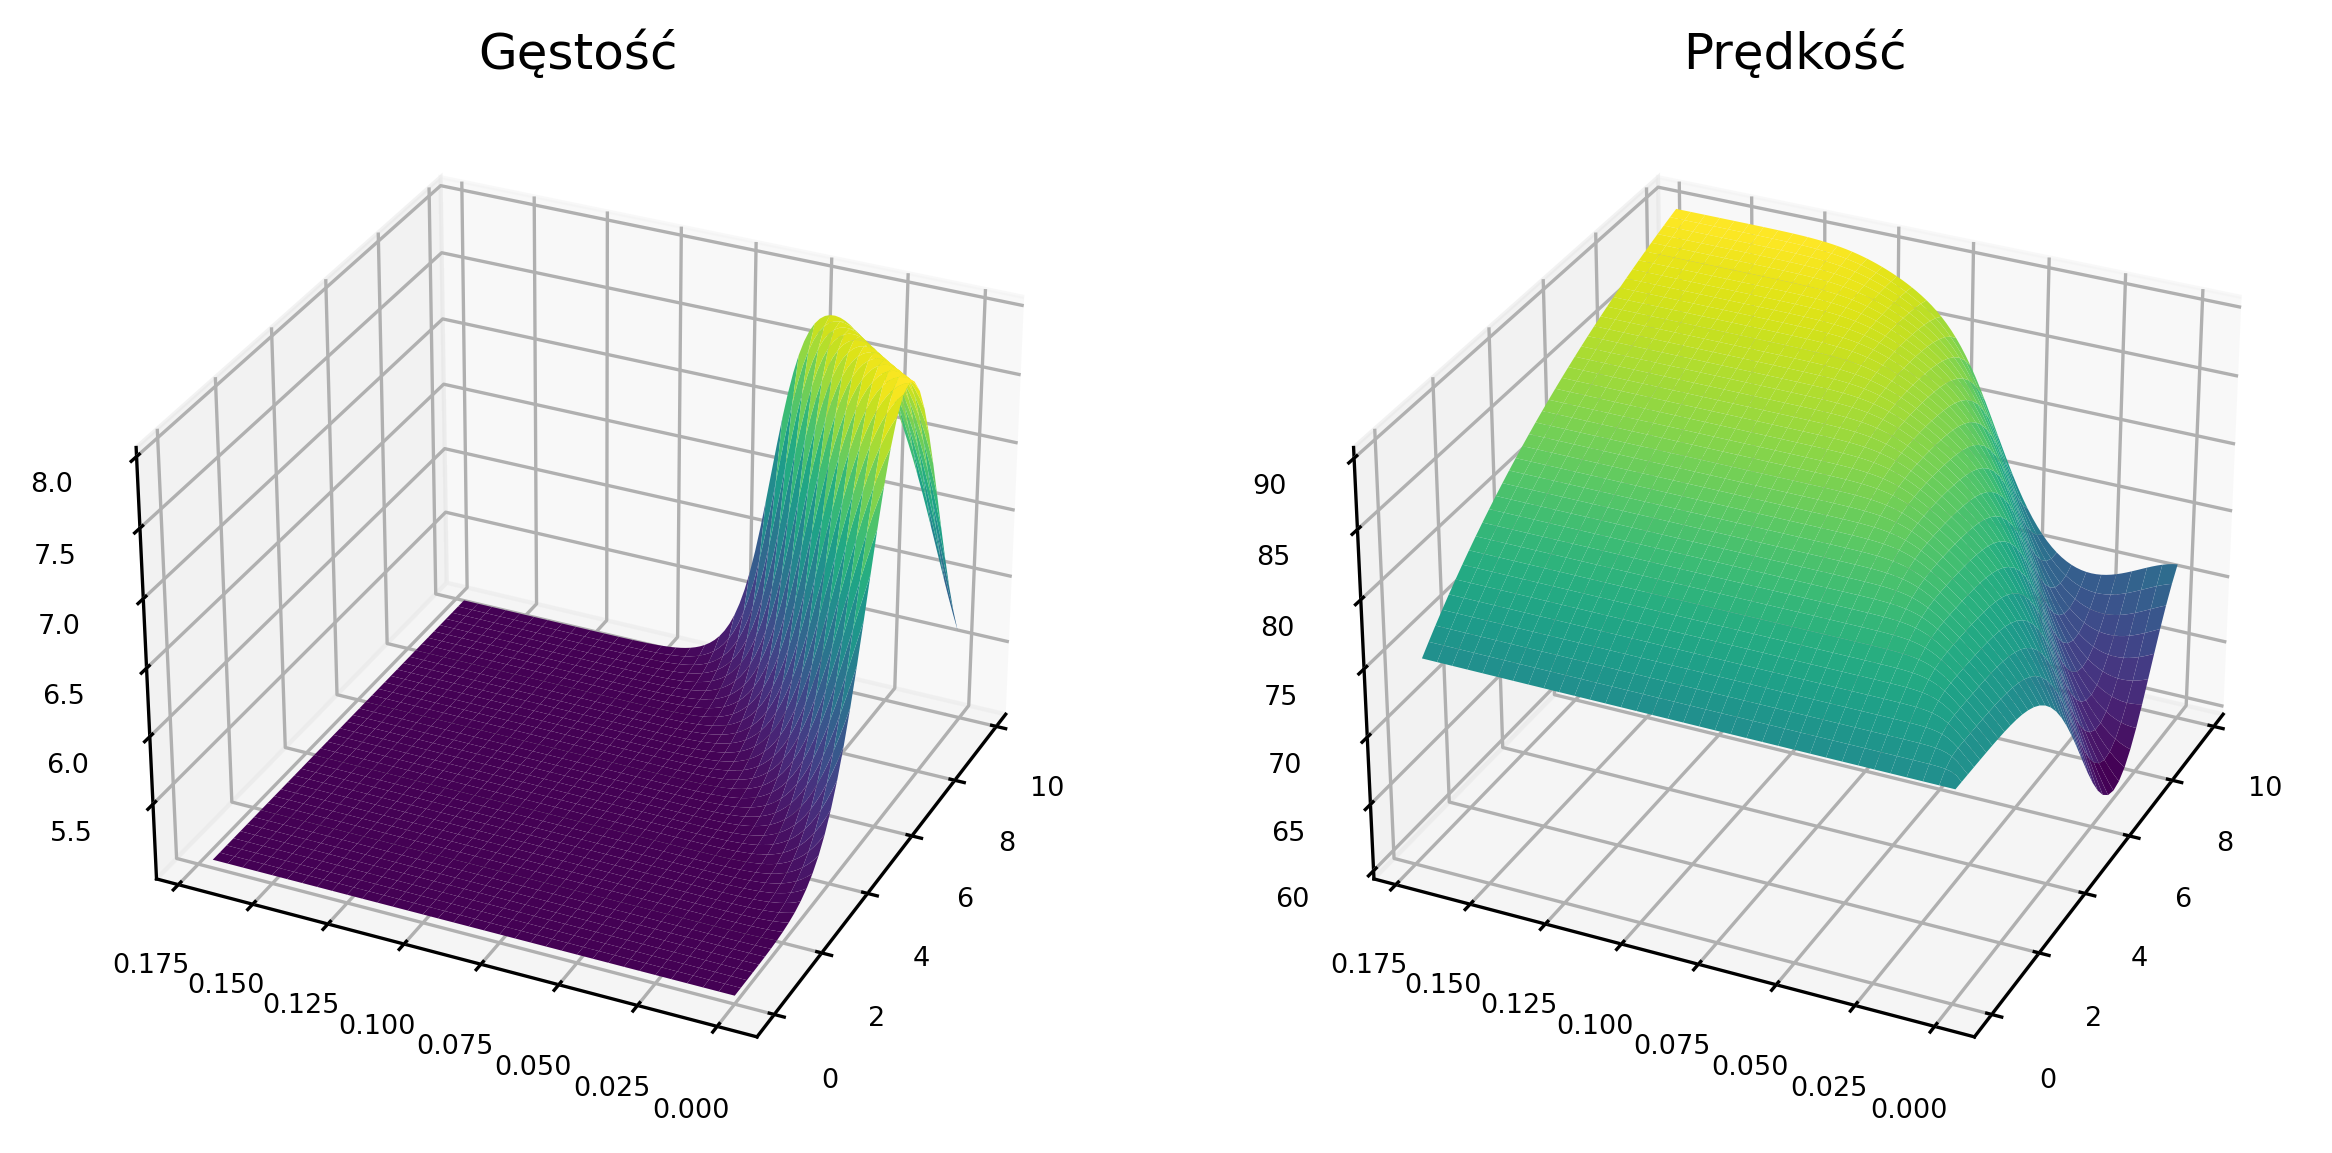

In [9]:
r2, v2, c = FTBS_2((init_rho, init_v), (bound_rho_1, bound_v_1), k, h, rho_max, v_max, tau, chi, c0, l, m)

##### Względna różnica między schematem pierwszym i drugim

In [10]:
print("W normie L1")
print("Gęstość: " + str(Lp_error(r1, r2, h, k)/Lp_error(np.zeros(r1.shape), r1, h, k)))
print("Prędkość: " + str(Lp_error(v1, v2, h, k)/Lp_error(np.zeros(v1.shape), v1, h, k)))
print("W normie L2")
print("Gęstość: " + str(Lp_error(r1, r2, h, k, 2)/Lp_error(np.zeros(r1.shape), r1, h, k, 2)))
print("Prędkość: " + str(Lp_error(v1, v2, h, k, 2)/Lp_error(np.zeros(v1.shape), v1, h, k, 2)))

W normie L1
Gęstość: 0.4884905180995576
Prędkość: 0.004114137511454628
W normie L2
Gęstość: 0.9636919243328448
Prędkość: 0.01310497356099792


#### Rozwiązanie schematem symetrycznym
Ten schemat nie jest zalecany ze względu na niestabilność.

/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:162: RuntimeWarning: invalid value encountered in scalar power
  v[s, t] = v[s, t-1] + k/tau*(v_max*(1 - (rho[s, t-1]/rho_max)**l)**m - v[s, t-1]) \


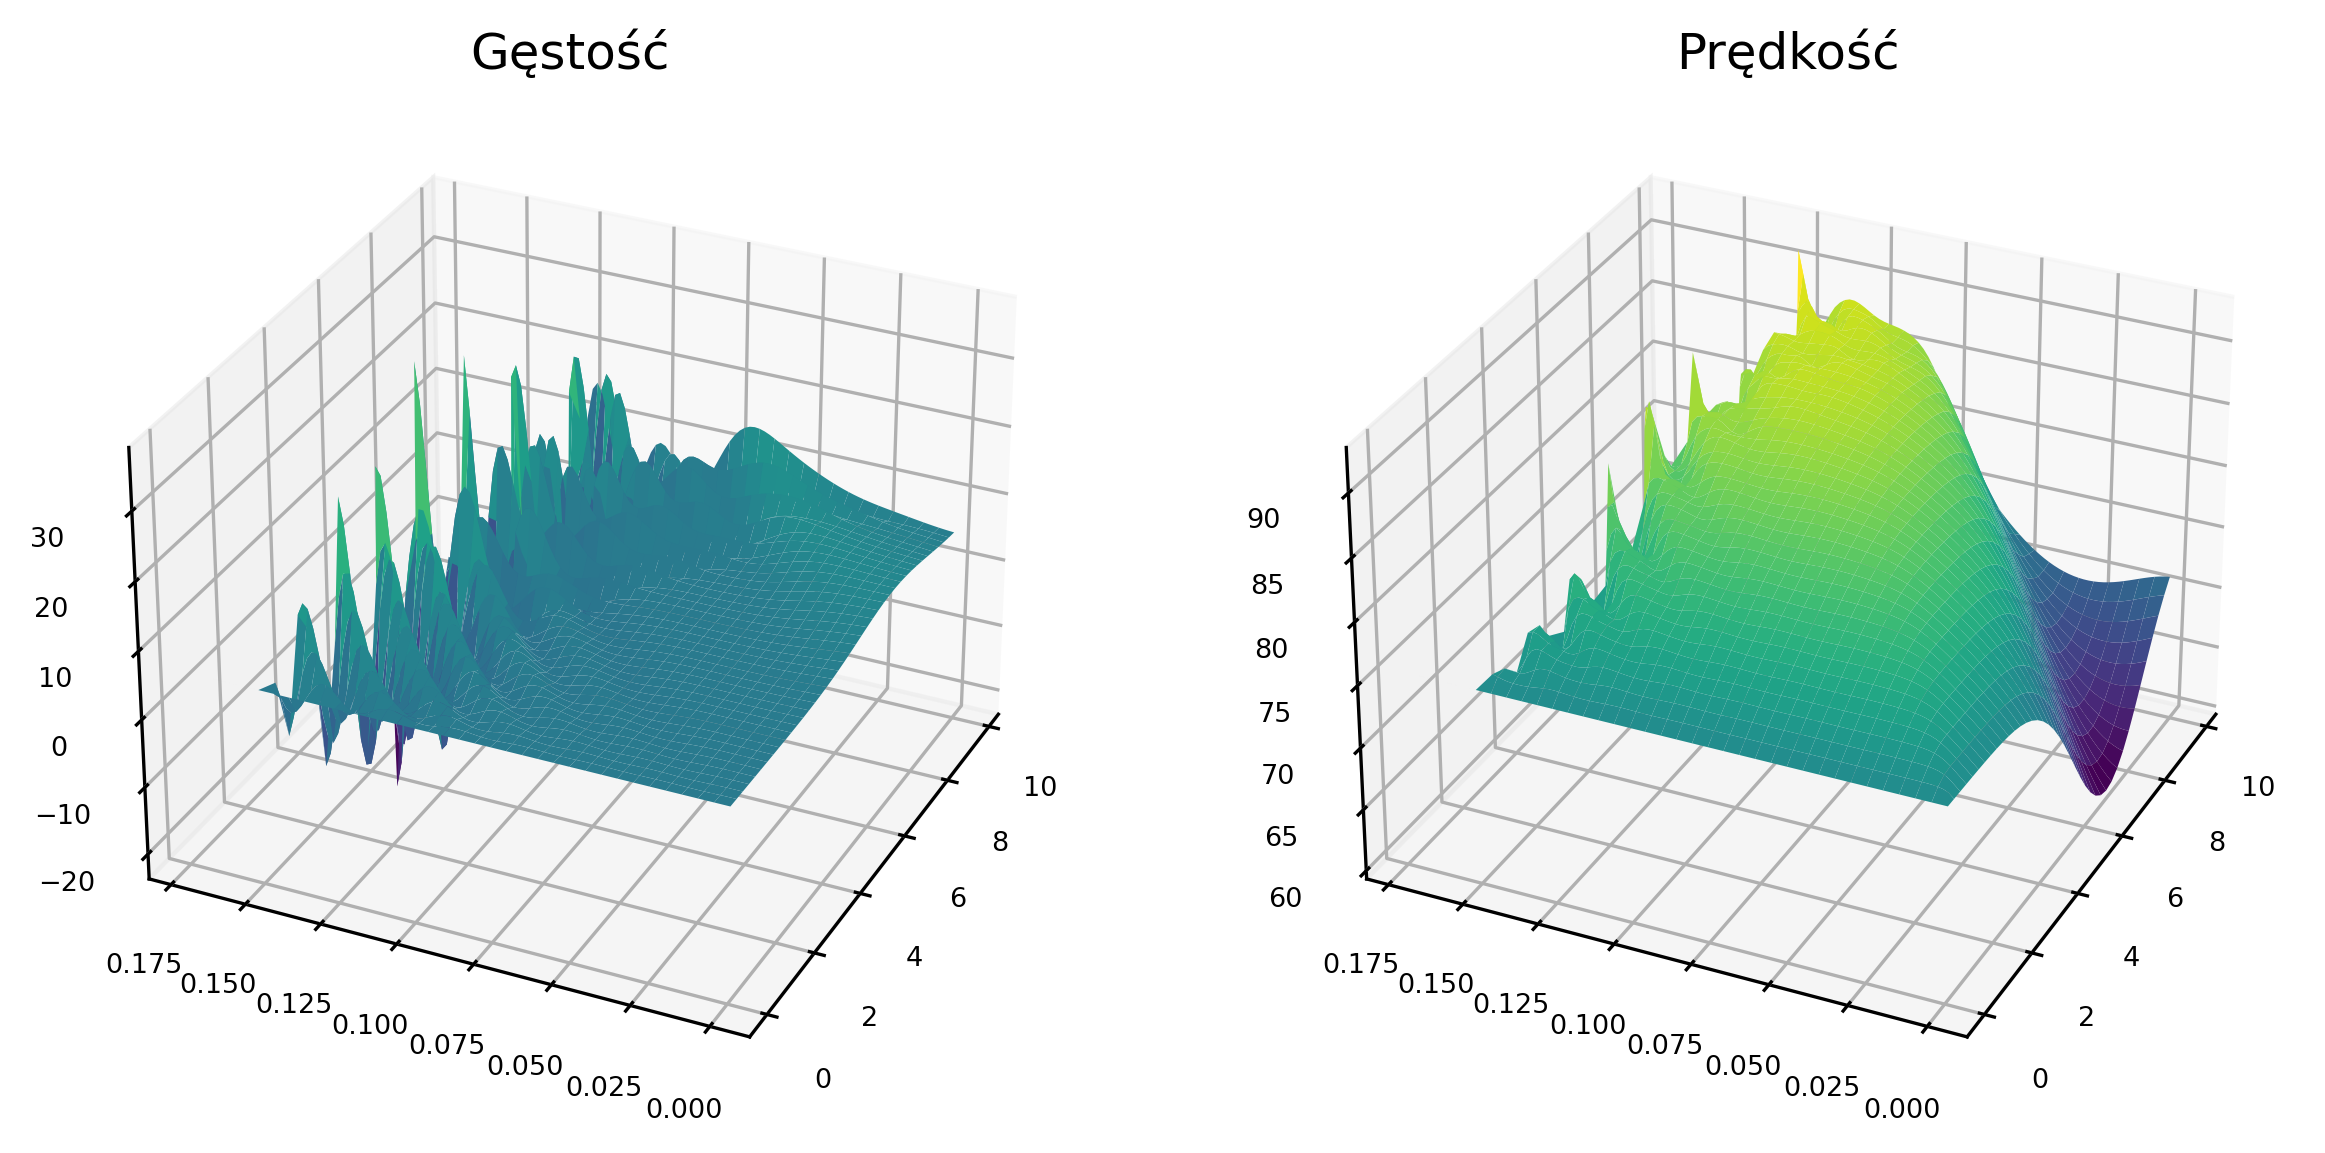

In [11]:
r, v, c = FTCS((init_rho, init_v), (bound_rho_1, bound_rho_2, bound_v_1, bound_v_2), k, h, rho_max, v_max, tau, chi, c0, l, m)

## Testy

Rozwiązanie sztuczne:

\begin{align*}
\rho(x, t) = 20 - \frac{(x - 8)^2}{12} - \frac{(t - 0.15)^2}{0.0016}\\
\rho_{max} = 20, v_{max} = 100\\
v(x, t) = v_{max}(1 - \frac{\rho}{\rho_{max}}) = 5\left[\frac{(x - 8)^2}{12} + \frac{(t - 0.15)^2}{0.0016}\right]
\end{align*}

In [12]:
N = 10
T = 30
k = 1/180 # w godzinach
h = 1 # w kilometrach
rho_max = 20
v_max = 100
tau = 0.1
chi = 120
c0 = 350
l = 1
m = 1

In [13]:
space = np.linspace(0, h*N, N+1)
time = np.linspace(0, k*T, T+1)

#### Wizualizacja sztucznego rozwiązania

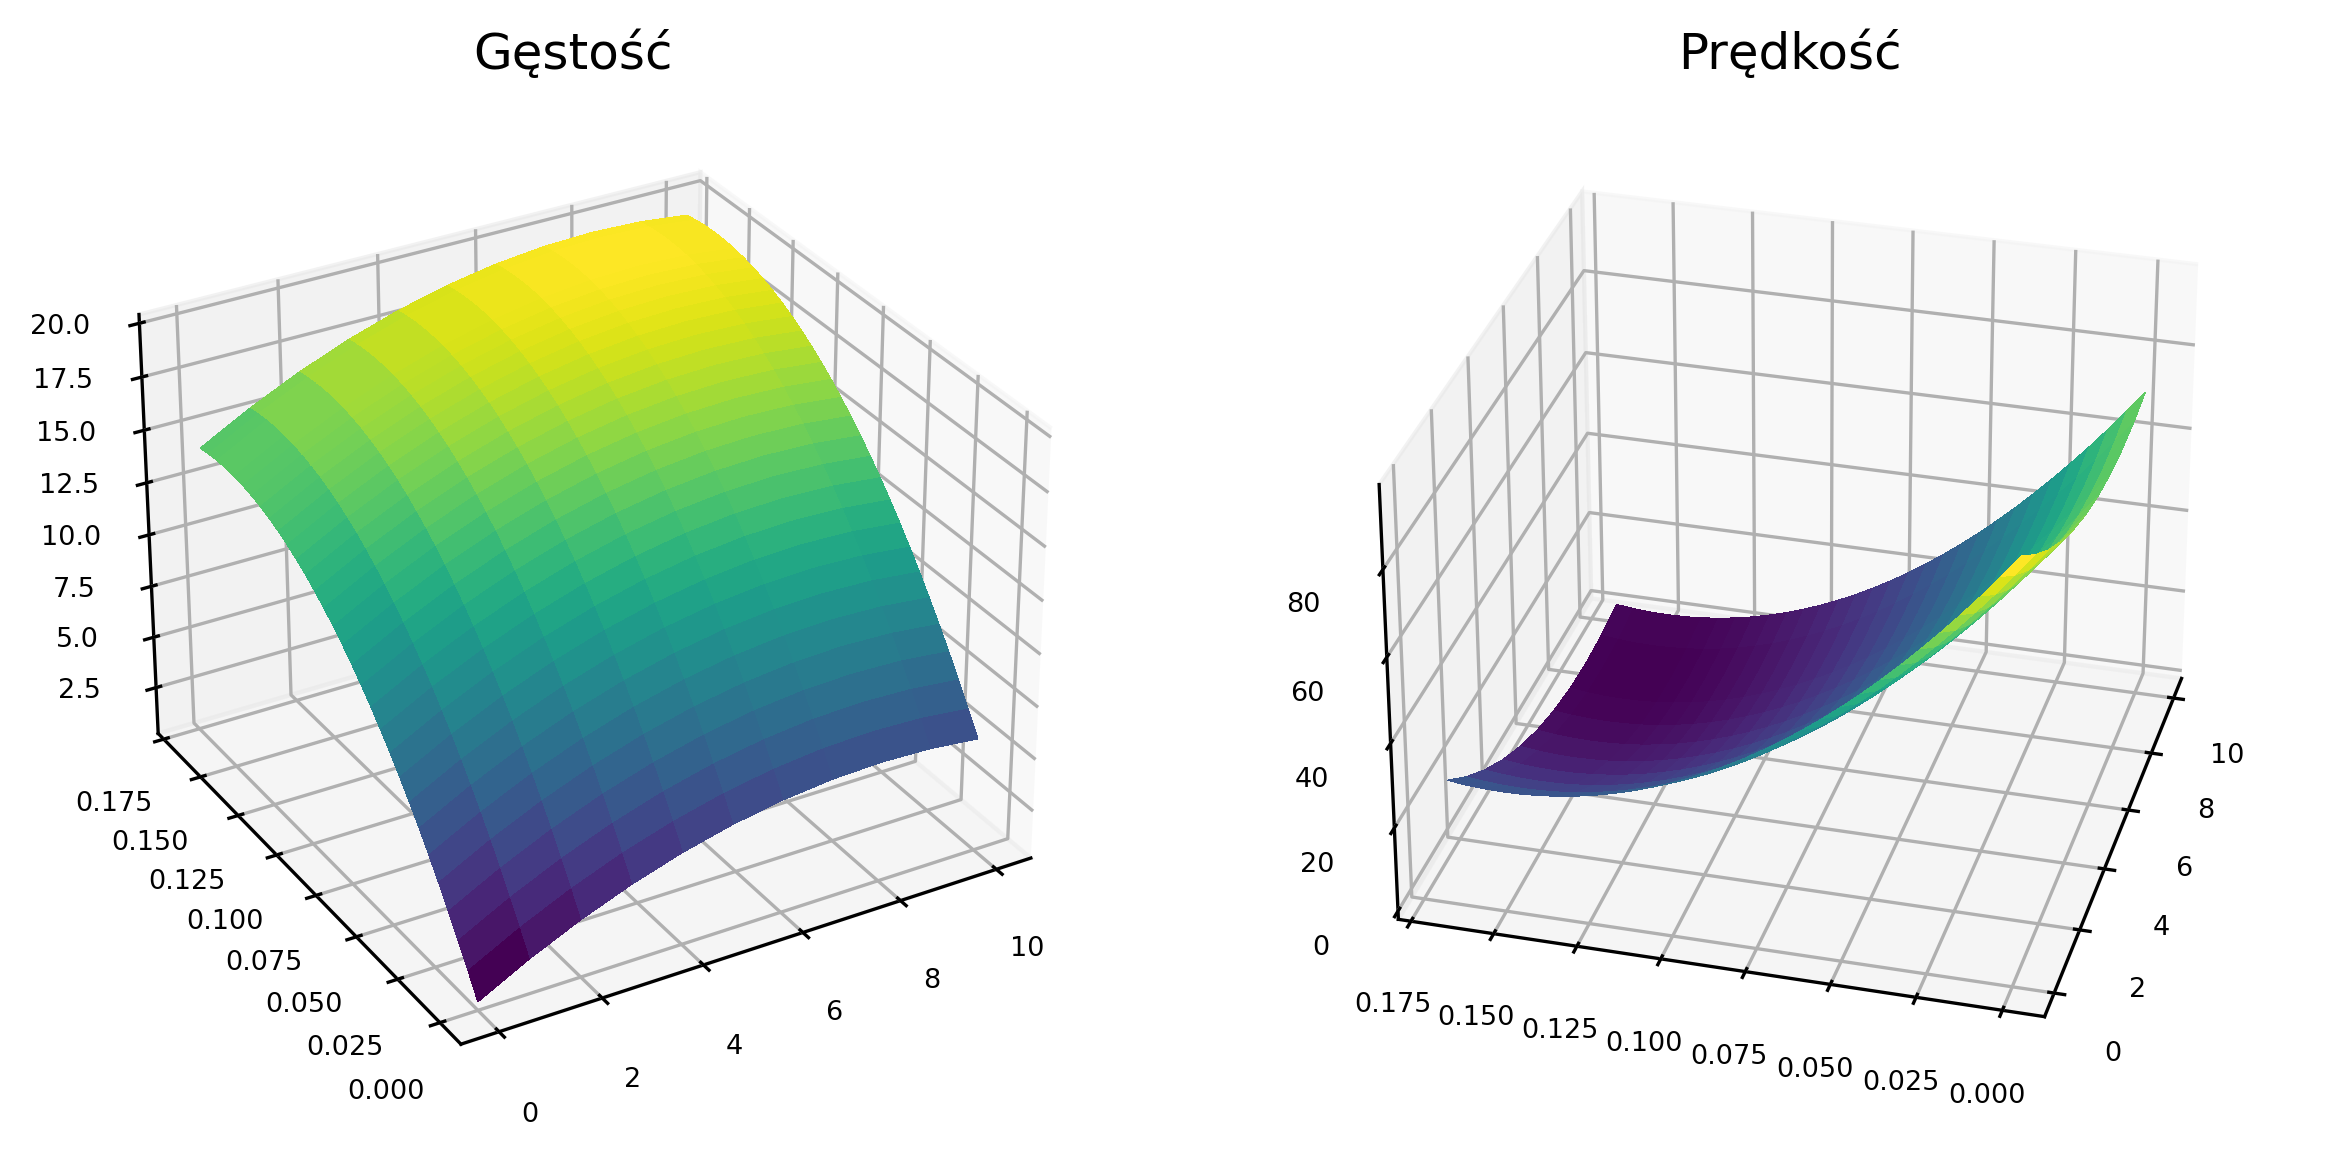

In [14]:
S, T = np.meshgrid(space, time)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

U = 20 -(S - 8)**2/12 - (T - 0.15)**2/0.0016
V = 100*(1 - U/20)
ax.plot_surface(S, T, U, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=-120)
ax.set_title('Gęstość')
ax.tick_params(axis='both', which='major', labelsize=6.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(S, T, V, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=-165)
ax.set_title('Prędkość')
ax.tick_params(axis='both', which='major', labelsize=6.5)

plt.show()

#### Wizualizacja rozwiązania dopasowanym schematem

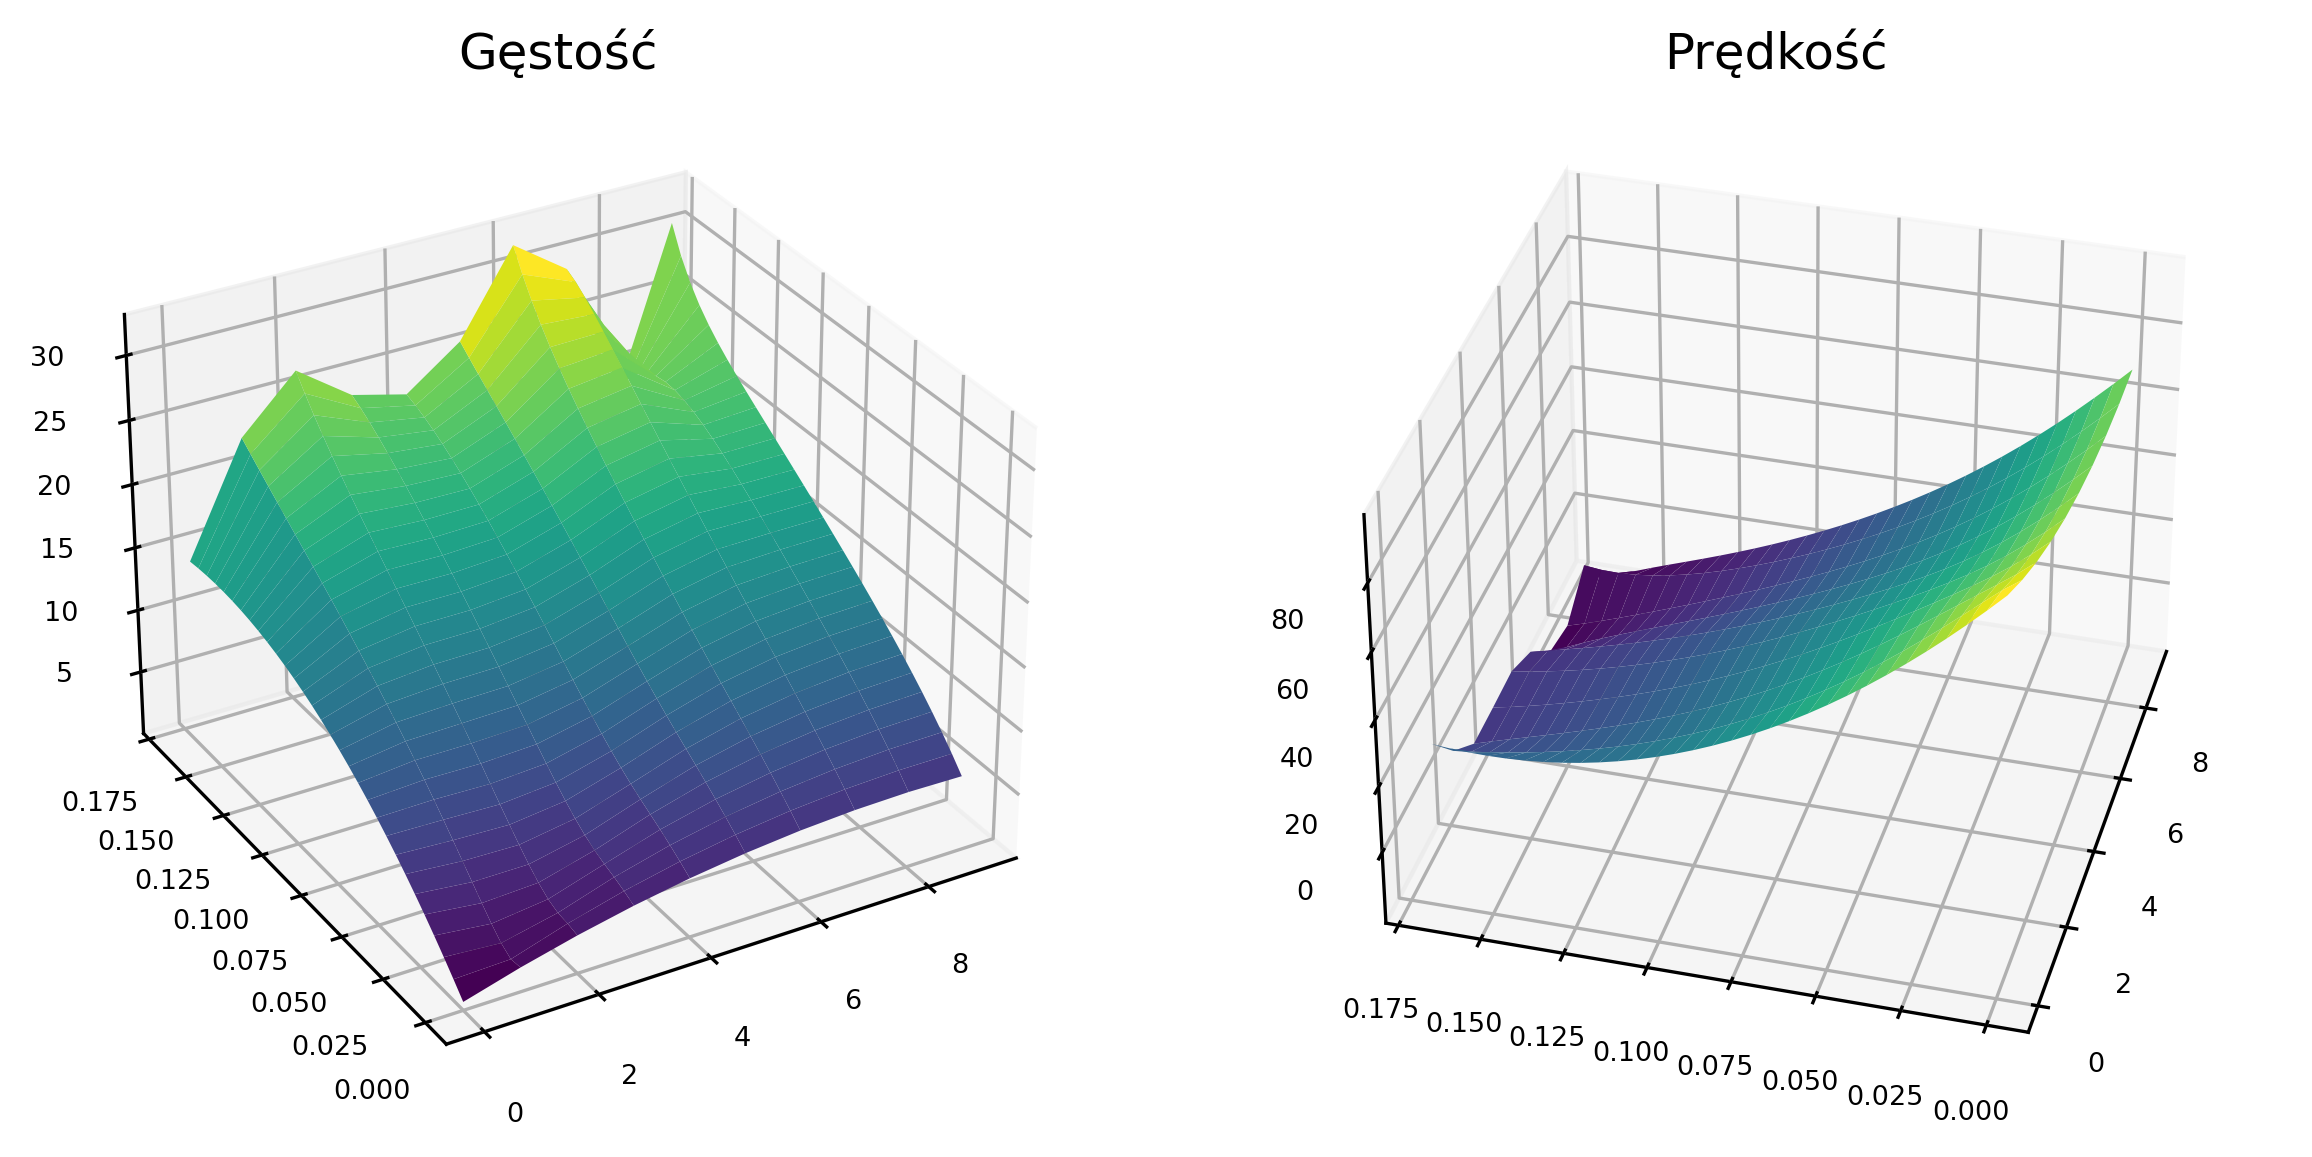

In [15]:
rho, v, cfl = crafted_solution((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Błąd rozwiązania w normie $L_1$

In [16]:
print("Błąd rozwiązania dla gęstości wynosi w przybliżeniu " + str(round(Lp_error(U, rho.transpose(), h, k), 3)))
print("Błąd rozwiązania dla prędkości wynosi w przybliżeniu " + str(round(Lp_error(V[:, 0:-1], v.transpose(), h, k), 3)))

Błąd rozwiązania dla gęstości wynosi w przybliżeniu 7.685
Błąd rozwiązania dla prędkości wynosi w przybliżeniu 5.471


#### Jak wyglądałoby to rozwiązanie niezmodyfikowanym schematem?

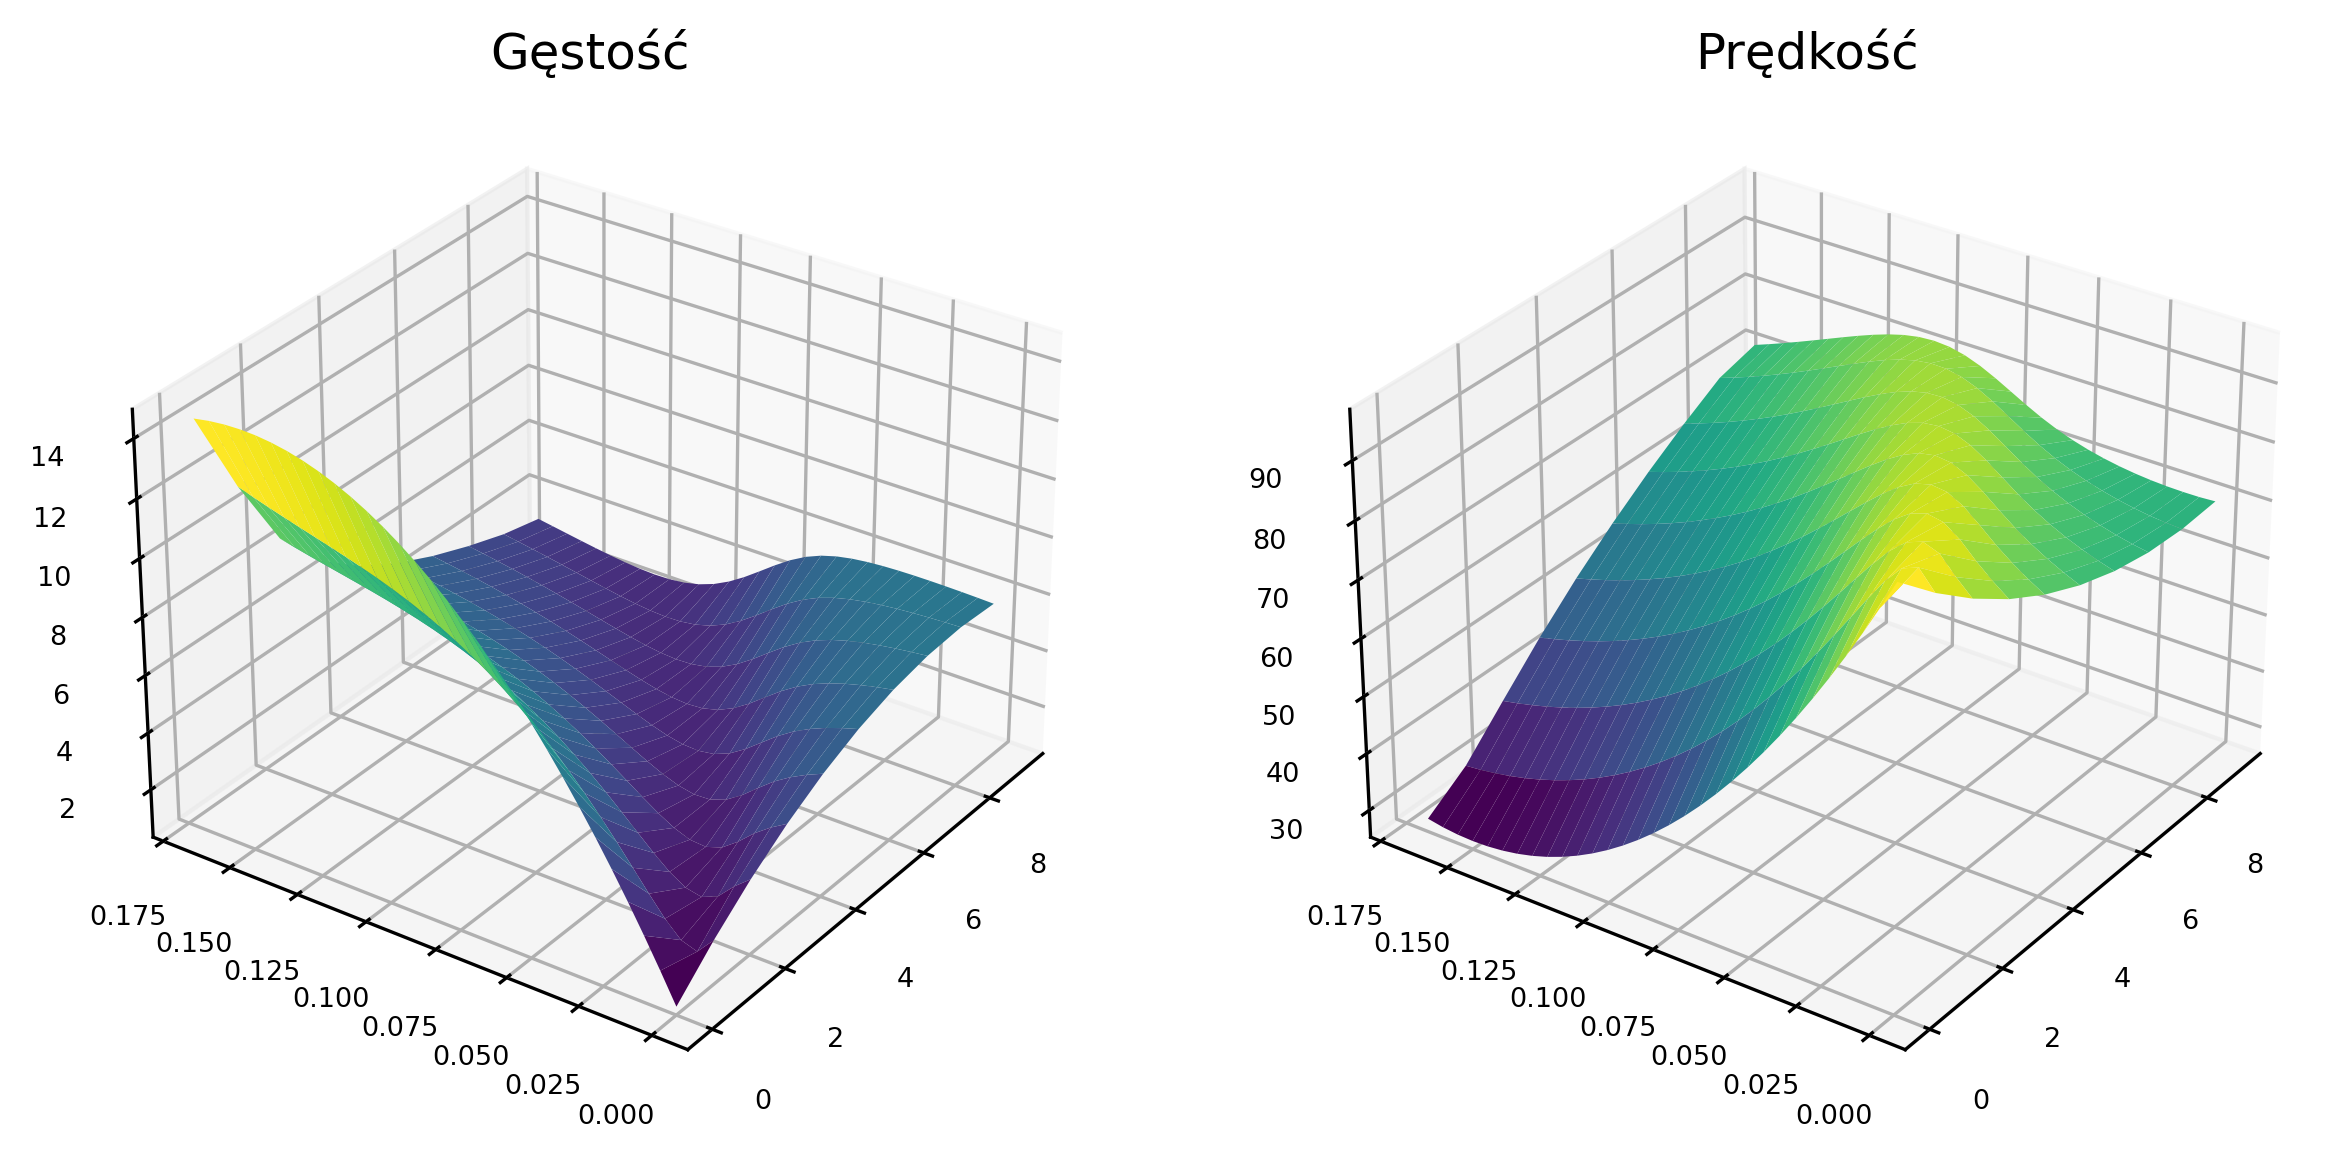

In [17]:
rho, v, cfl = FTBS((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Porównanie błędów dla różnych wartości $k$ i $h$

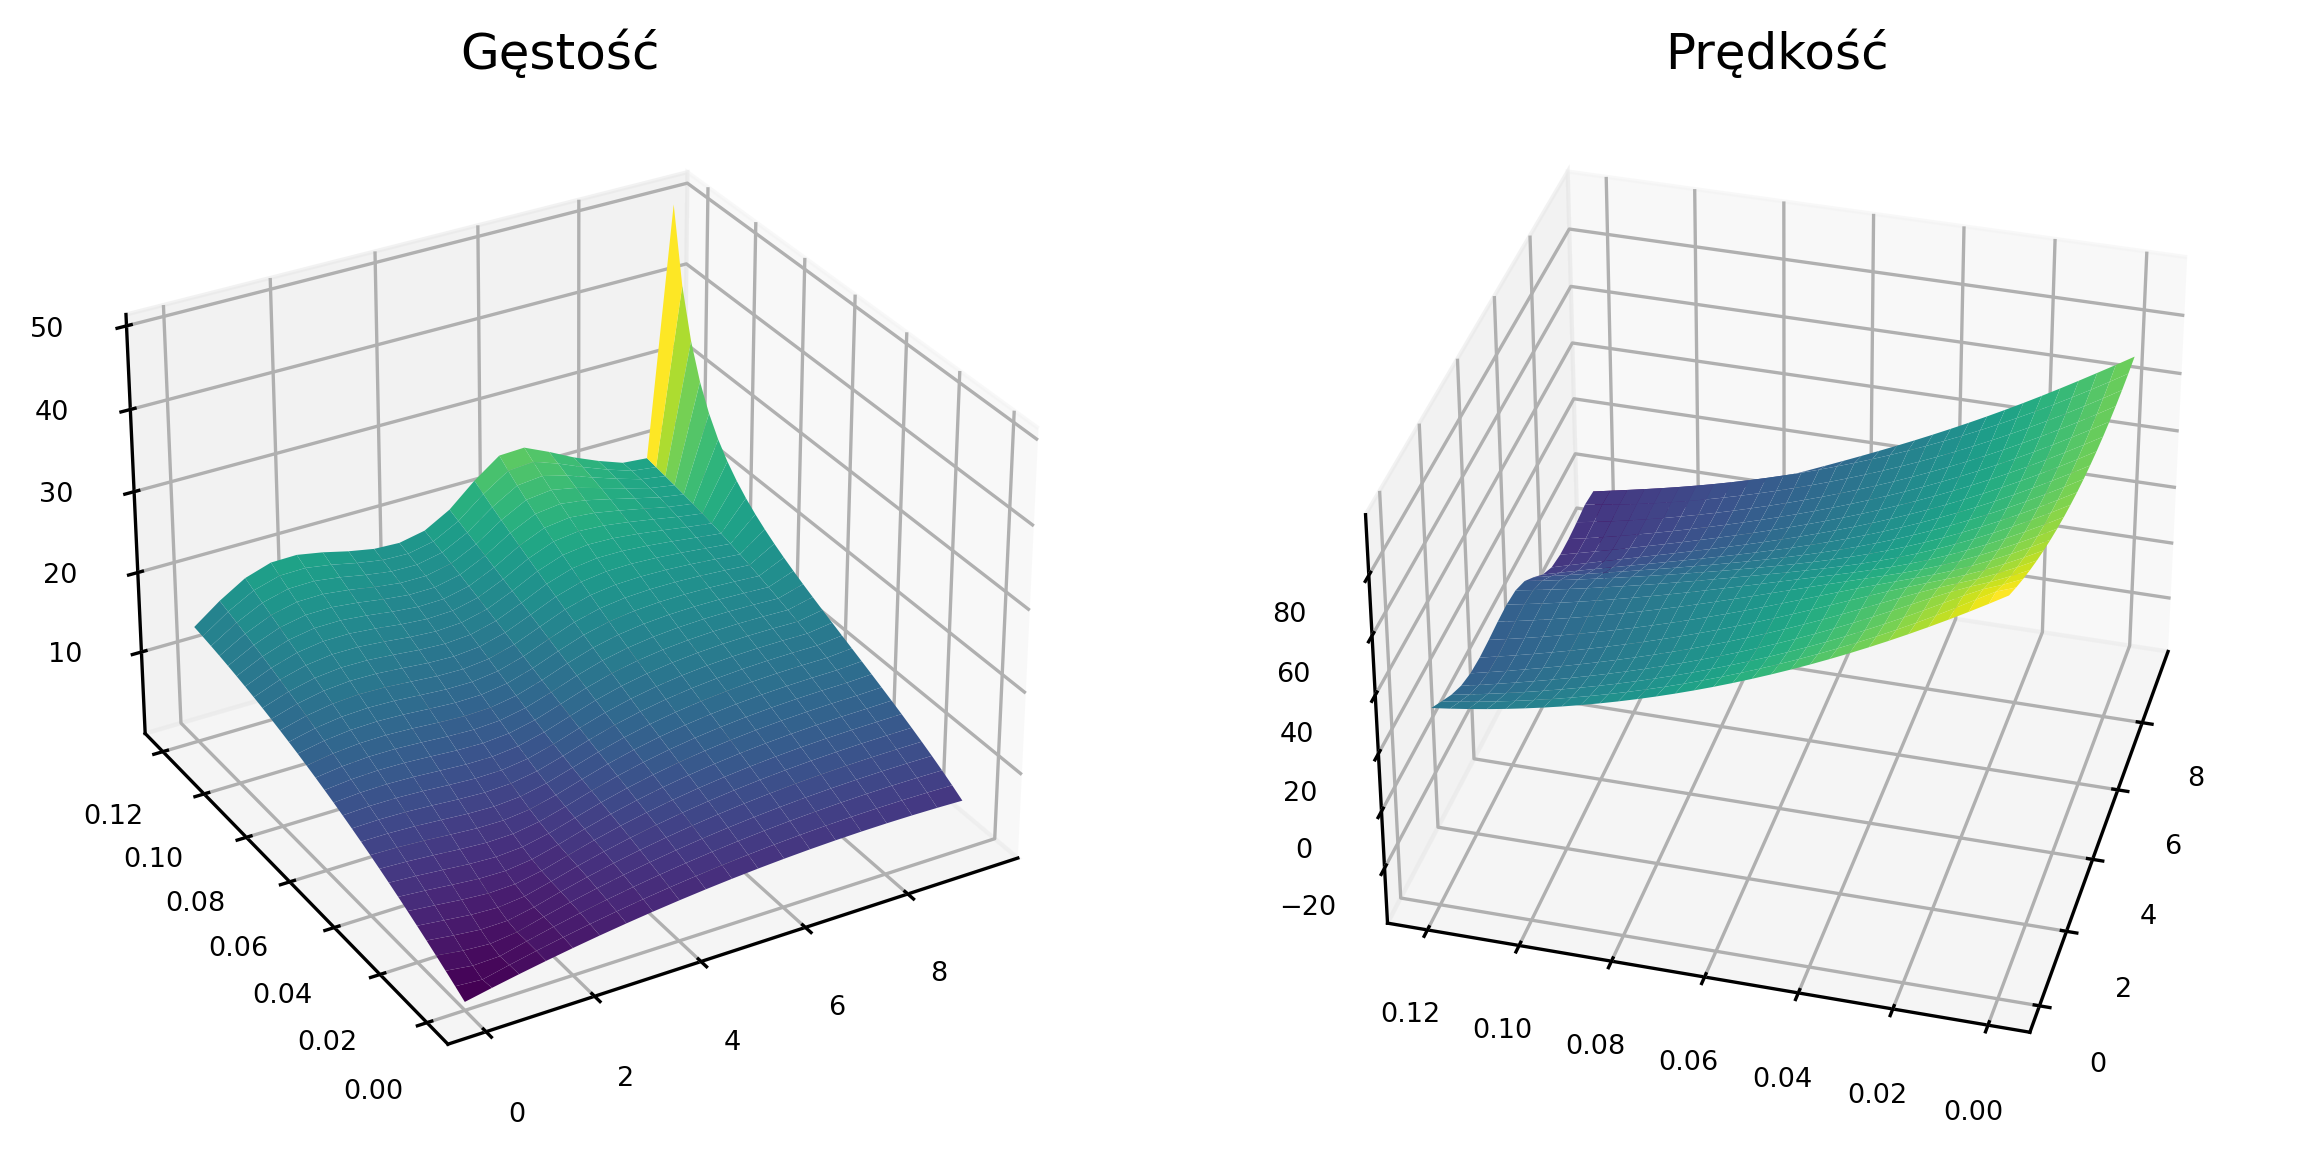

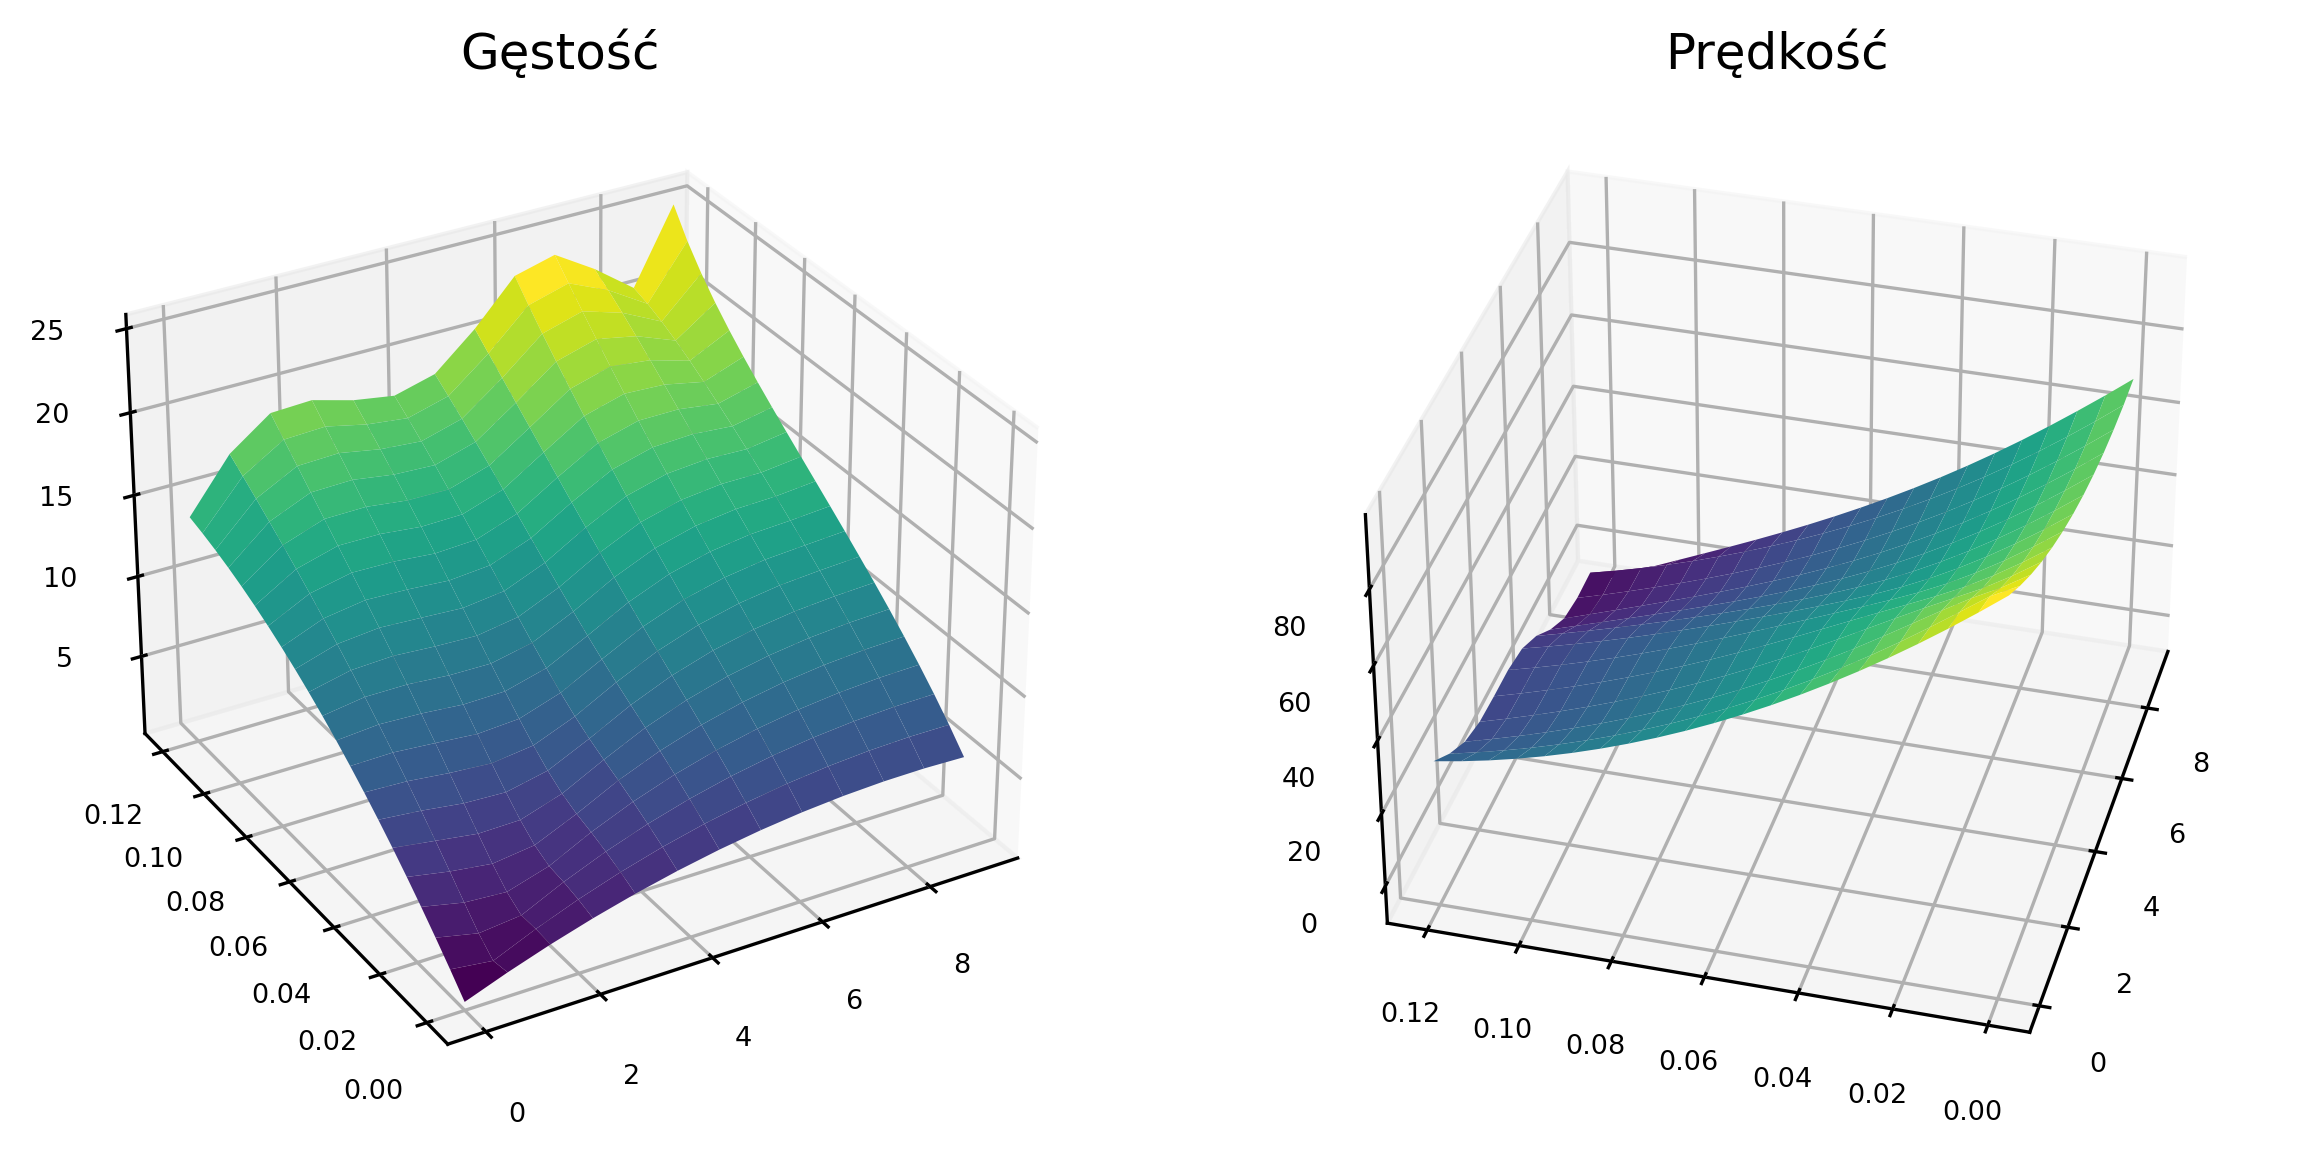

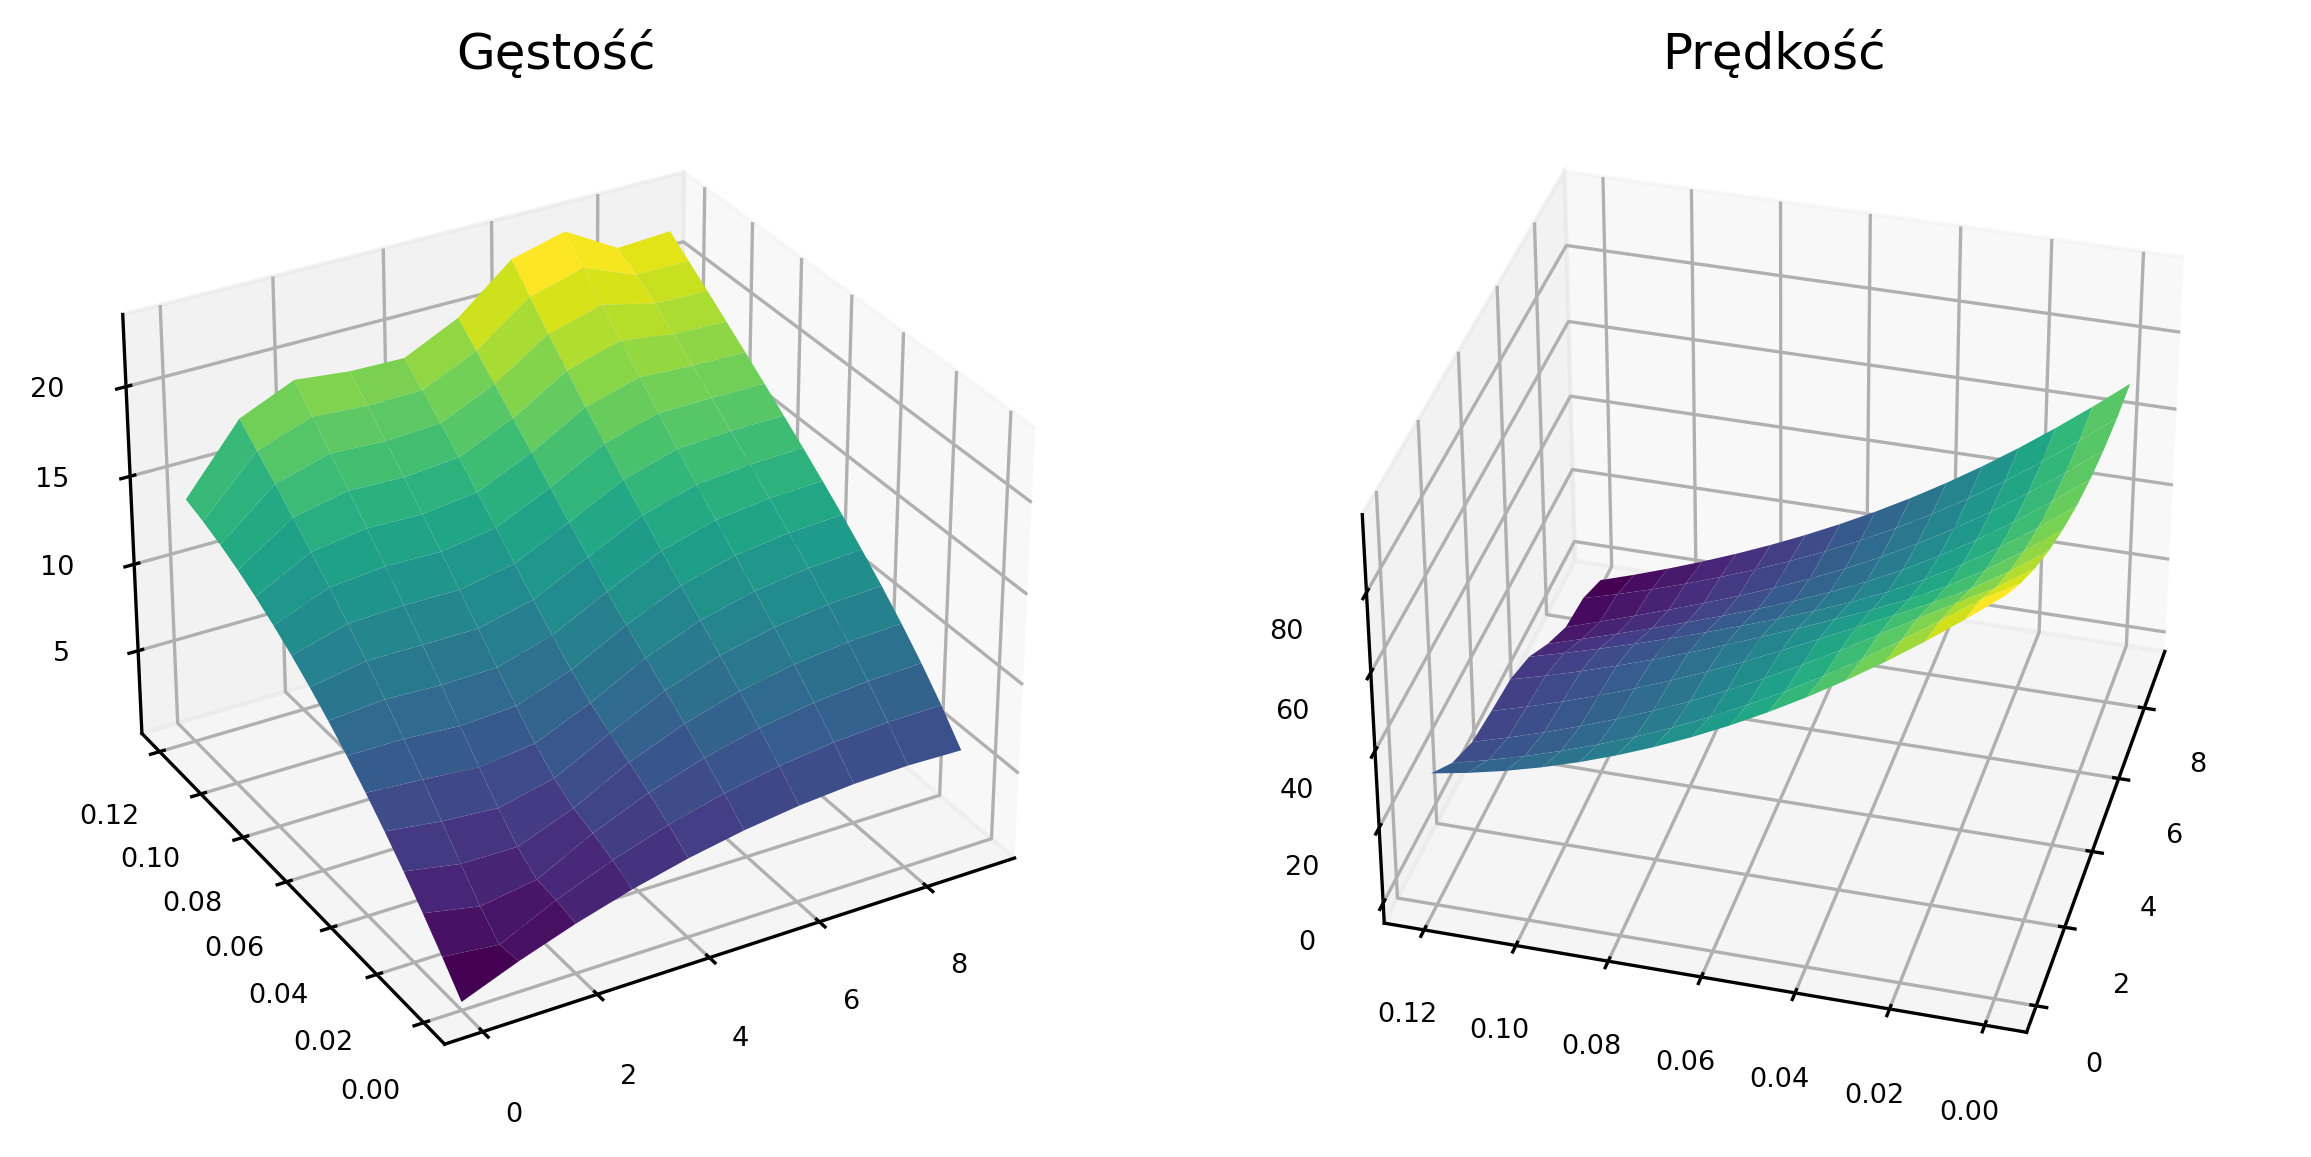

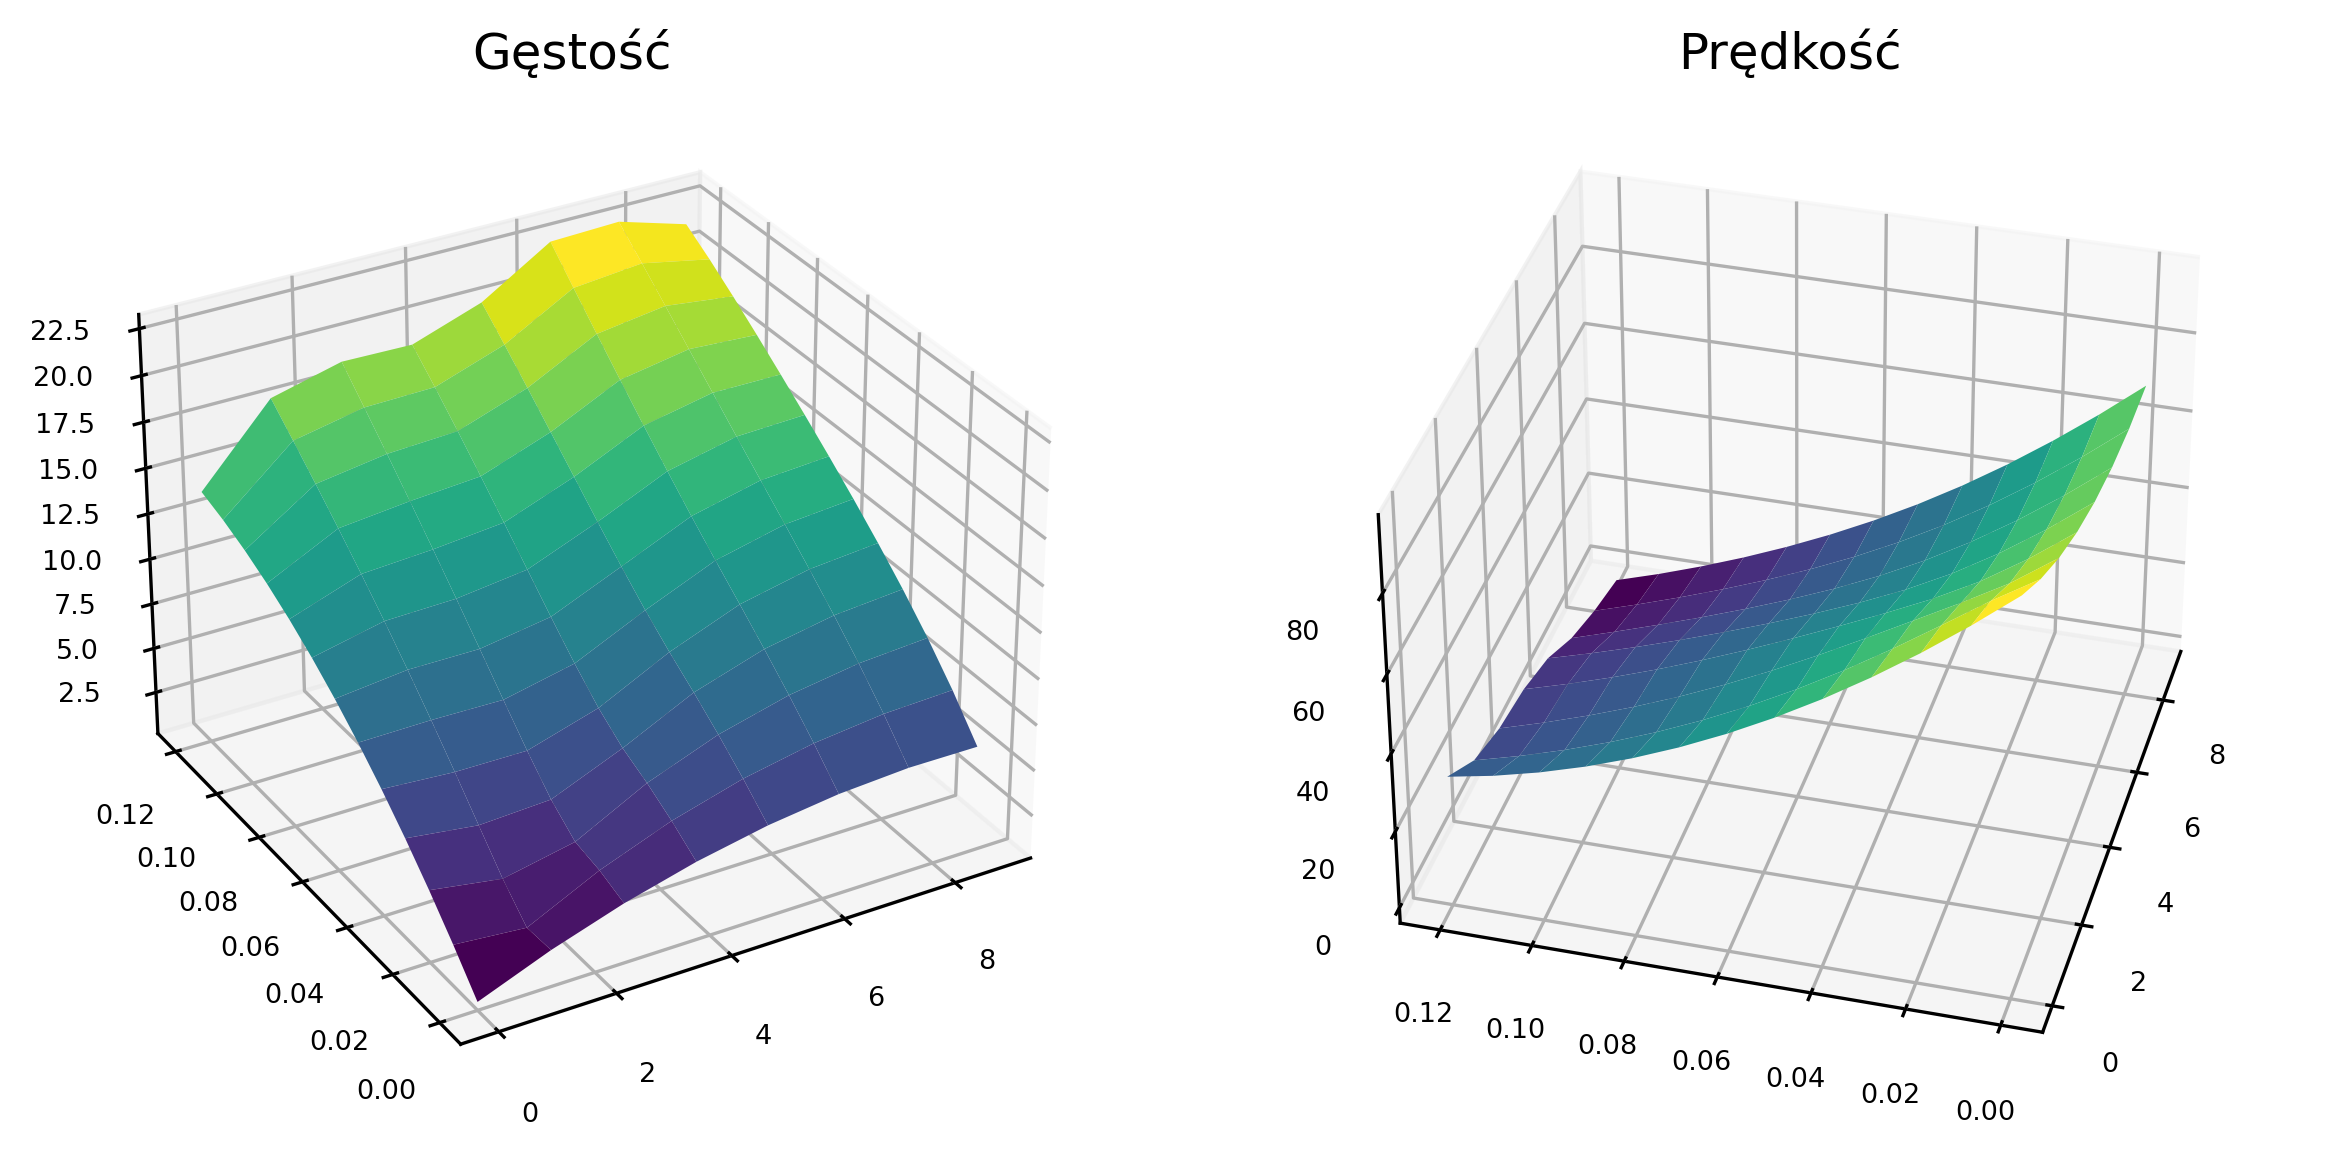

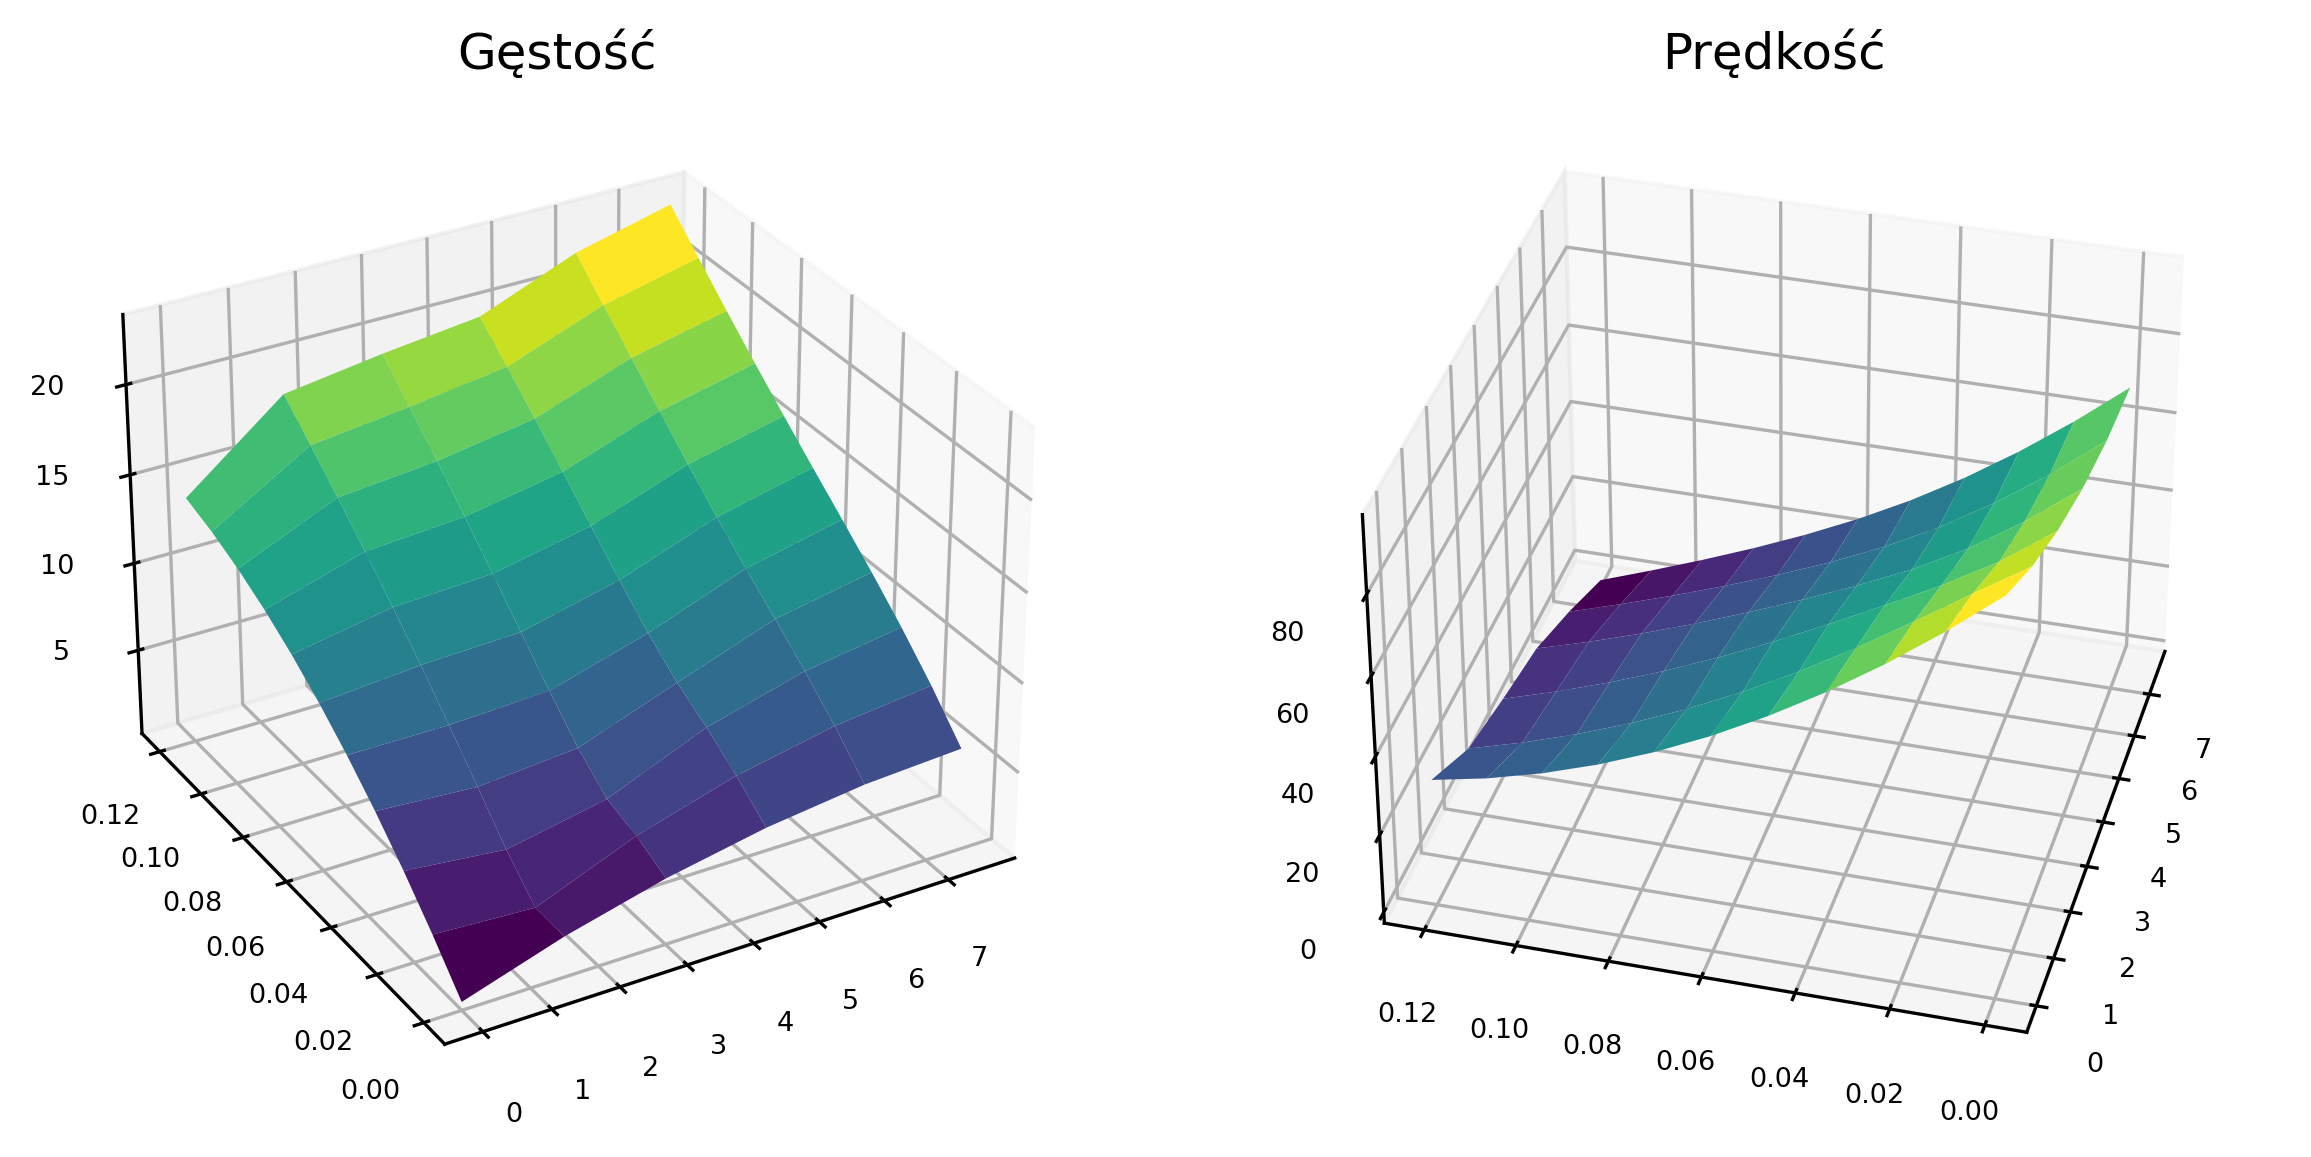

In [18]:
from math import floor
h_test = np.arange(0.5, 1.6, 0.25)
errors_rho = []
errors_v = []
point_errors_t1 = []
point_errors_t2 = []
for i in range(len(h_test)):
    h = h_test[i]
    k = h/125
    space = np.arange(0, 10 + 0.01, h)
    time = np.arange(0, 0.12 + 0.0001, k)
    half_time = int(floor((len(time)-1)/2))
    S, T = np.meshgrid(space, time)
    U = 20 -(S - 8)**2/12 - (T - 0.15)**2/0.0016
    V = 100*(1 - U/20)
    rho, v, cfl = crafted_solution((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m)
    errors_rho.append(Lp_error(U[:, 0:-1], rho.transpose()[:, 0:-1], h, k))
    errors_v.append(Lp_error(V[:, 0:-2], v.transpose()[:, 0:-1], h, k))
    point_errors_t1.append(np.abs(U[half_time, :] - rho.transpose()[half_time, :]))
    point_errors_t2.append(np.abs(U[-1, :] - rho.transpose()[-1, :]))

t1 = time[half_time]
t2 = time[-1] 

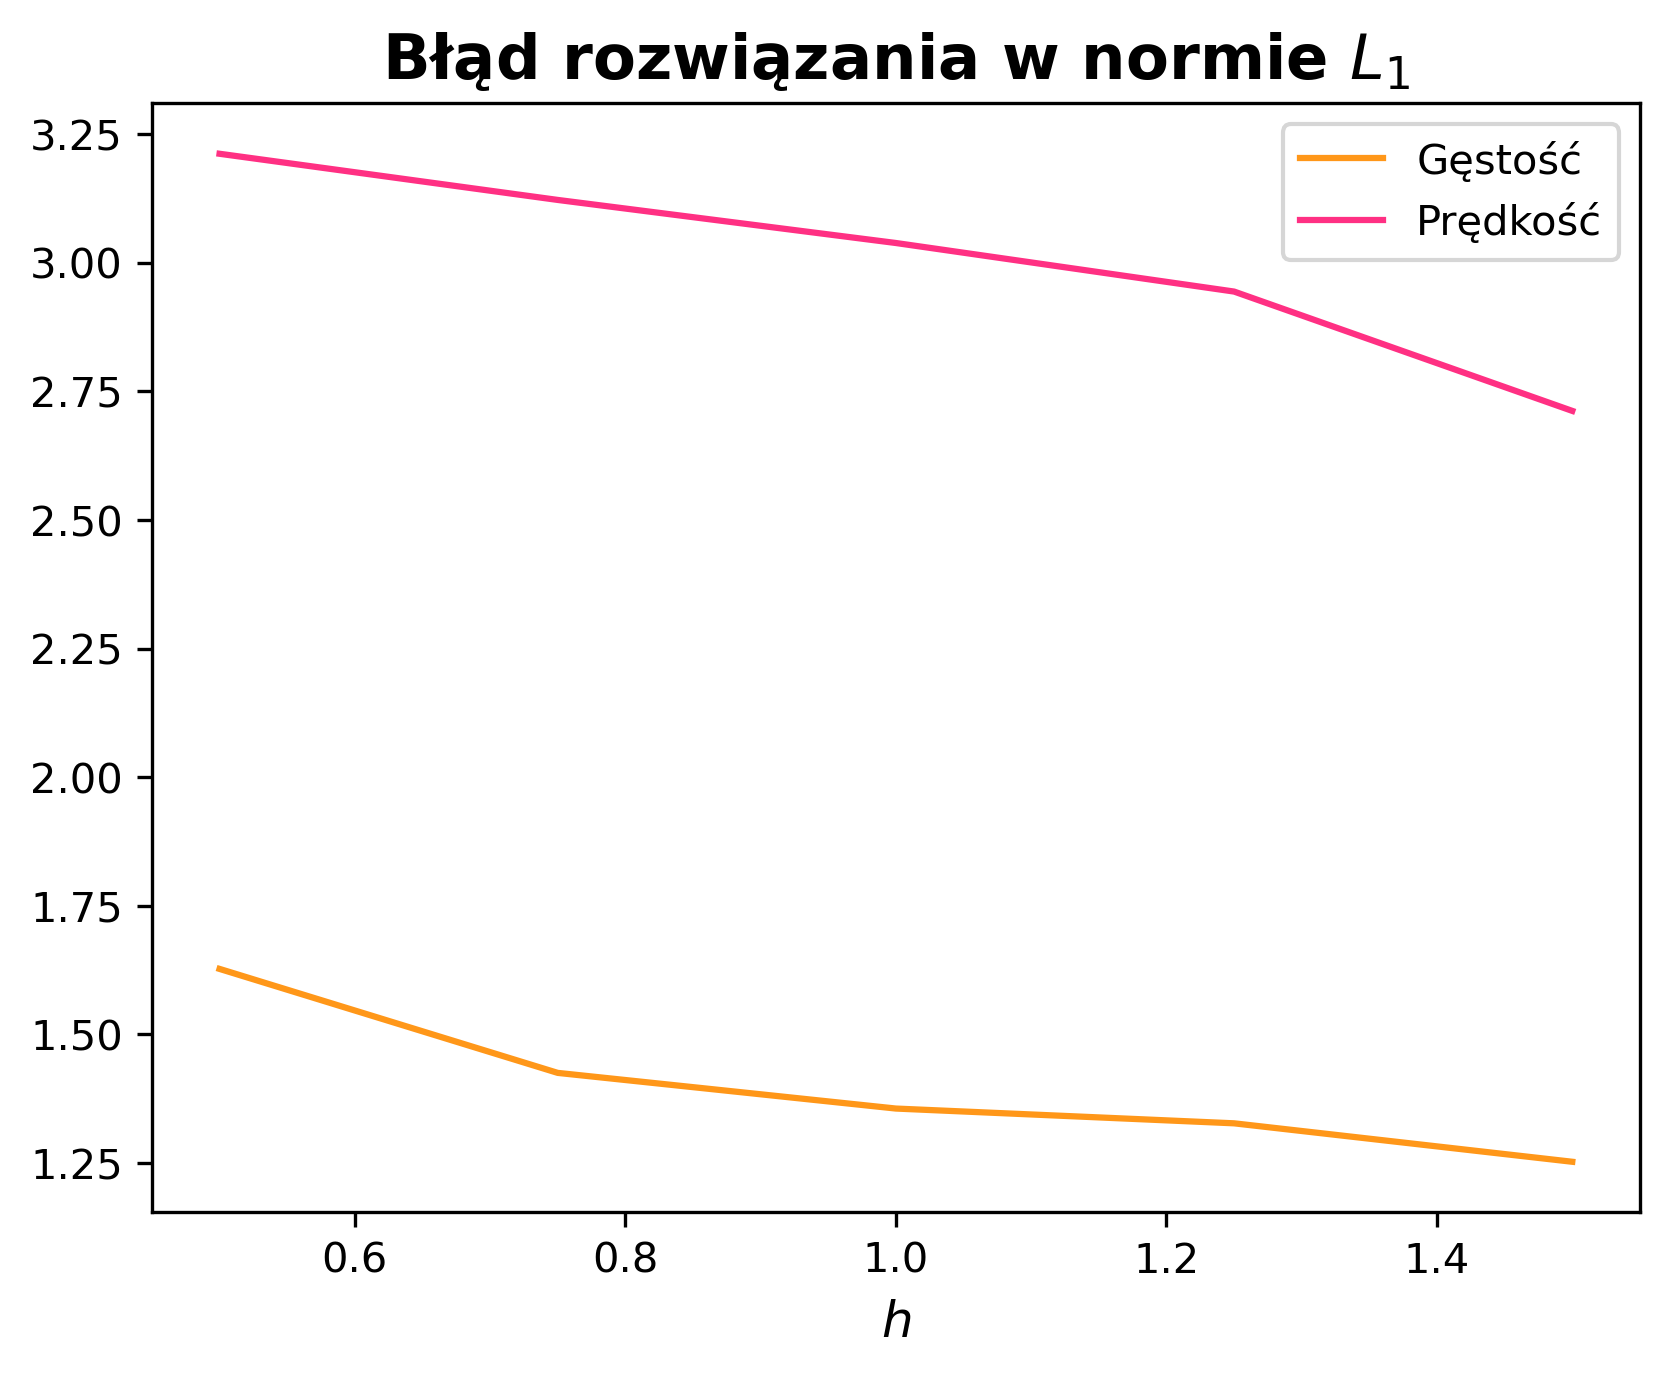

In [19]:
colors = ["#FF9719", "#1EC14E", "#FF3083", "#01FBFF", "#B632FF"]
plt.plot(h_test, errors_rho, label="Gęstość", color=colors[0])
plt.plot(h_test, errors_v, label="Prędkość", color=colors[2])
plt.title("Błąd rozwiązania w normie $L_1$", fontweight="bold", fontsize=15)
plt.xlabel("$h$", fontweight="bold", fontsize=12)
plt.legend()
plt.show()

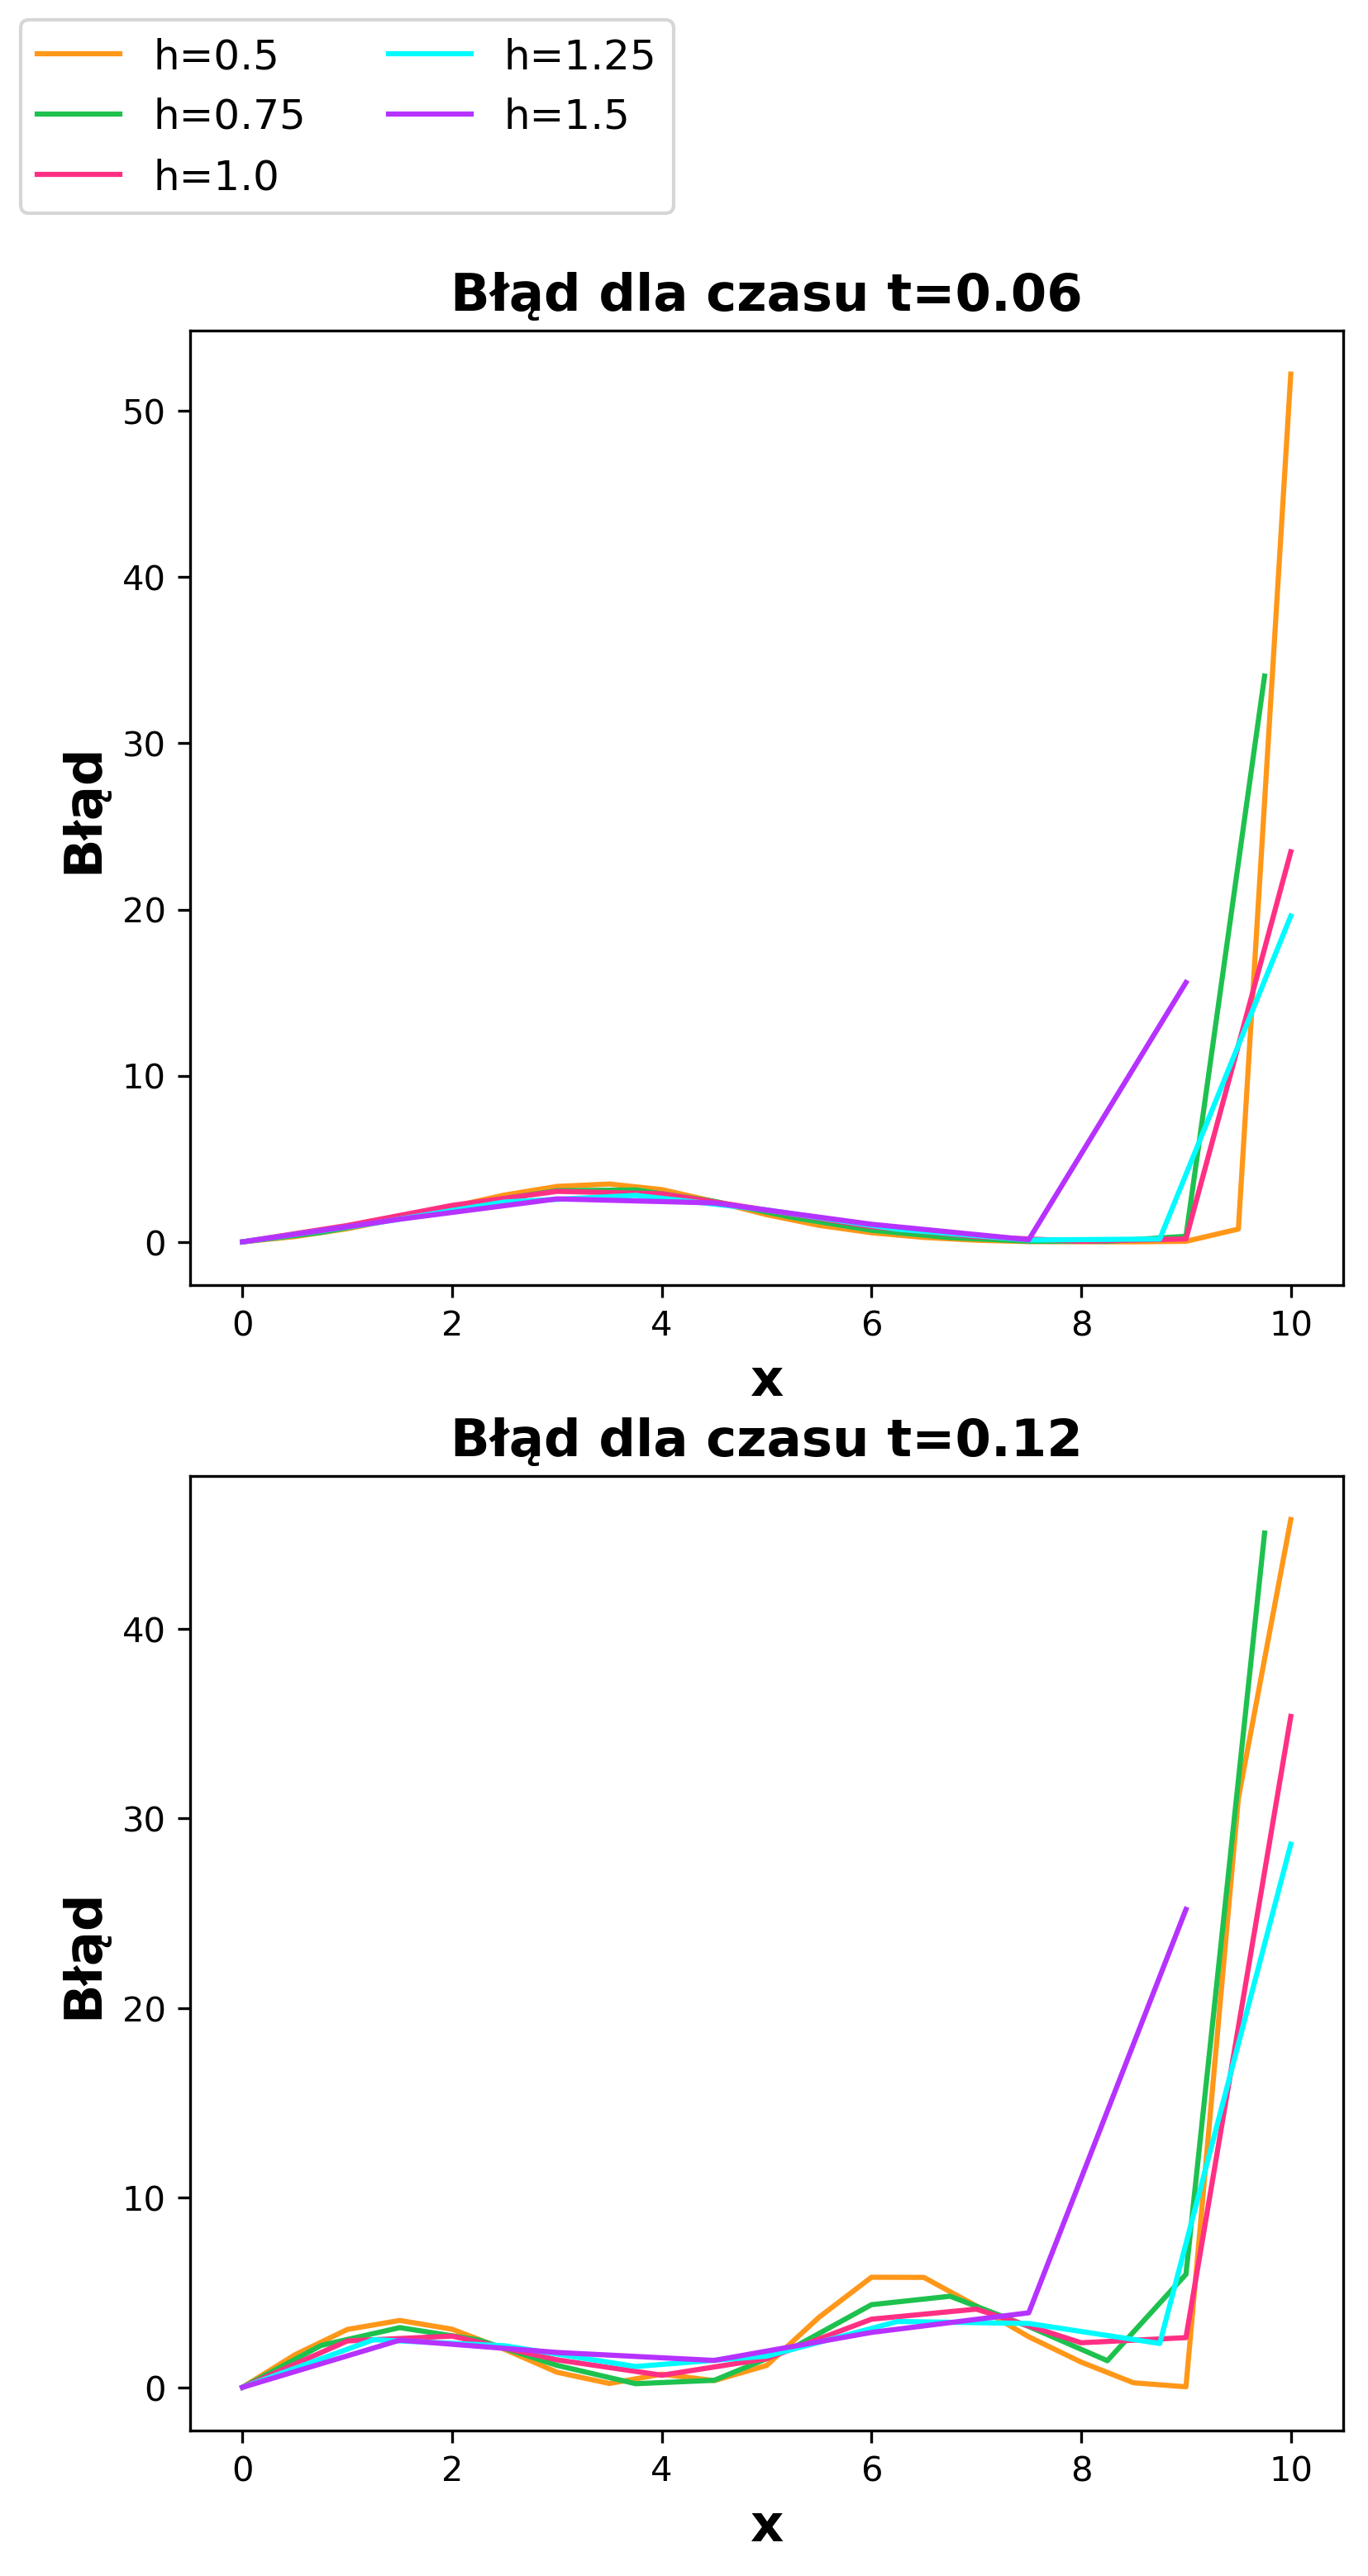

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(6, 11))
for i in range(len(point_errors_t1)):
    ax[0].plot(np.arange(0, 10 + 0.01, h_test[i]), point_errors_t1[i], label="h=" + str(h_test[i]), color=colors[i])
    ax[1].plot(np.arange(0, 10 + 0.01, h_test[i]), point_errors_t2[i], color=colors[i])
ax[0].set_title("Błąd dla czasu t=" + str(t1), fontsize=15, fontweight="bold")
ax[0].set_xlabel("x", fontweight="bold", fontsize=15)
ax[0].set_ylabel("Błąd", fontweight="bold", fontsize=15)

ax[1].set_title("Błąd dla czasu t=" + str(t2), fontsize=15, fontweight="bold")
ax[1].set_xlabel("x", fontweight="bold", fontsize=15)
ax[1].set_ylabel("Błąd", fontweight="bold", fontsize=15)

fig.legend(loc="upper left", fontsize=12, ncol=len(h_test)/2)
plt.show()